In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import numpy as np
import statsmodels.tsa.api as sm
import warnings
warnings.filterwarnings('ignore')
sns.set()

/Users/weixin/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


### Loading the base dataset

In [2]:
def tsplot(y, lags=50, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))    
        y.plot(ax=ts_ax)
        p_value = sm.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        sm.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        sm.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        plt.tight_layout()
    return

In [99]:
df = pd.read_excel("Data/NEER_Economic_Indicators.xlsx")
df.head()

date     neer  cpi_adjusted  export_price_index  import_price_index  \
0 2011-01-01  114.565        90.214             111.960             113.030   
1 2011-01-02  114.870        90.261             113.635             115.507   
2 2011-01-03  114.925        90.341             115.333             116.868   
3 2011-01-04  115.808        91.316             116.138             117.220   
4 2011-01-05  116.310        91.182             113.871             115.186   

   export_price_index_machinery  export_price_index_manufactured  \
0                       111.832                          109.235   
1                       111.333                          111.804   
2                       109.971                          111.402   
3                       109.169                          111.878   
4                       108.145                          109.083   

   export_price_index_chem  export_price_index_misc_manufactured  \
0                  104.293                                98.961   
1                  105.348                                97.977   
2                  106.163                                98.354   
3                  106.324                                97.863   
4                  105.877                                97.459   

   export_price_index_mineral_fuels  ...  import_price_index_footwear  \
0                           121.899  ...                       94.518   
1                           130.476  ...                       94.443   
2                           142.362  ...                       94.413   
3                           148.487  ...                       94.385   
4                           140.853  ...                       96.168   

   cpi_adjusted_footwear  import_price_index_plumbing&lighting  \
0                 93.473                                95.891   
1                 94.861                                95.845   
2                 95.329                                95.779   
3                 94.530                                95.510   
4                 93.879                                95.464   

   import_price_index_furniture  import_price_index_electrical  \
0                        98.753                        107.415   
1                        98.584                        107.688   
2                        99.111                        107.130   
3                        99.415                        106.644   
4                        99.494                        105.838   

   cpi_adjusted_household_durables  import_price_index_communication  \
0                           84.130                           186.988   
1                           85.976                           186.561   
2                           86.238                           186.661   
3                           88.010                           170.264   
4                           88.758                           170.089   

   cpi_adjusted_communication  import_price_index_beverages&tobacco  \
0                     103.666                                94.914   
1                     103.532                                94.729   
2                     103.131                                94.222   
3                     103.074                                93.889   
4                     103.077                                93.677   

   cpi_adjusted_misc  
0             94.208  
1             94.048  
2             94.193  
3             94.190  
4             94.097  

[5 rows x 31 columns]

## Time series Analysis (Original)

### NEER

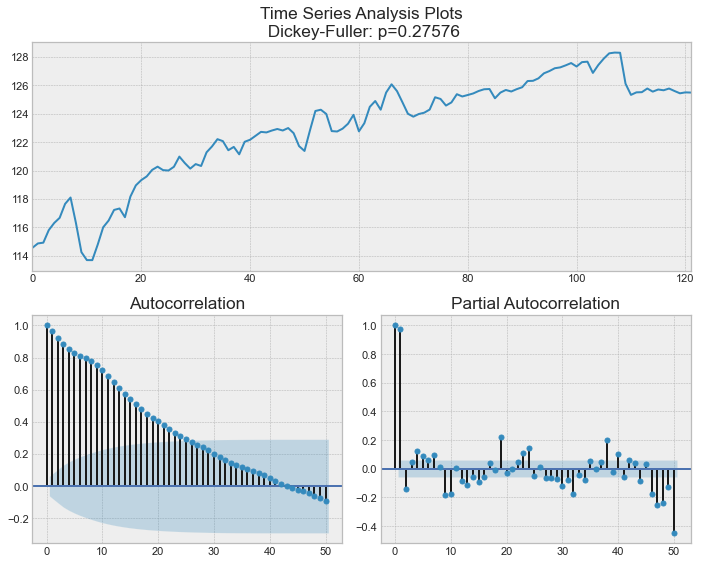

In [46]:
tsplot(df["neer"])

### CPI Adjusted

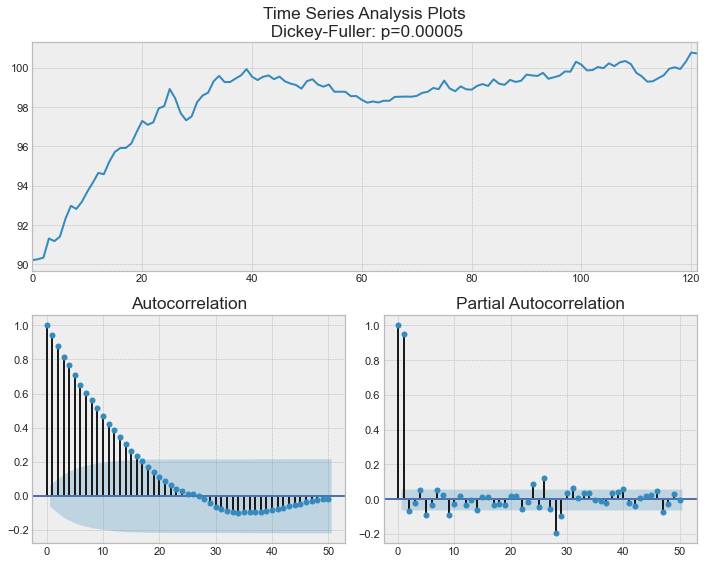

In [47]:
tsplot(df["cpi_adjusted"])

### Export Price Index

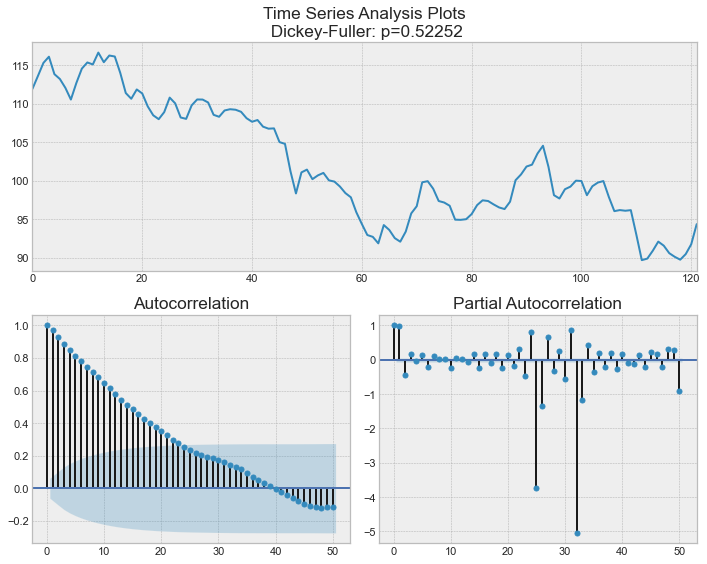

In [48]:
tsplot(df["export_price_index"])

### Import Price Index

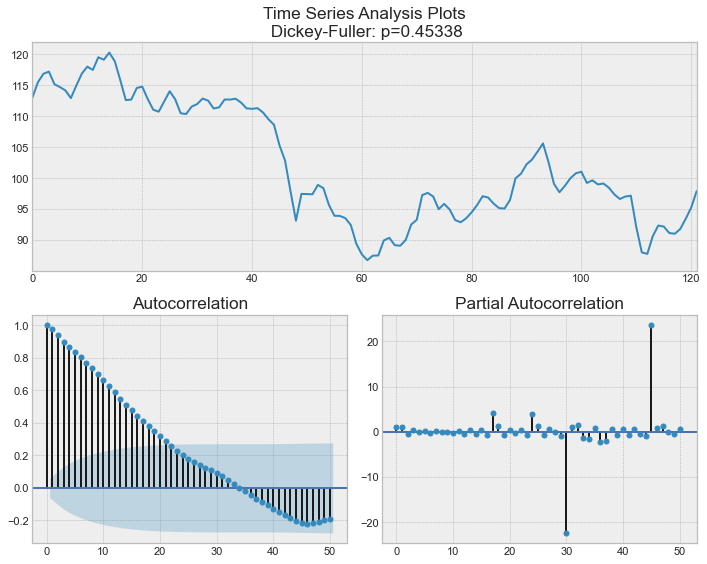

In [49]:
tsplot(df["import_price_index"])

### Non-Oil Import Price Index

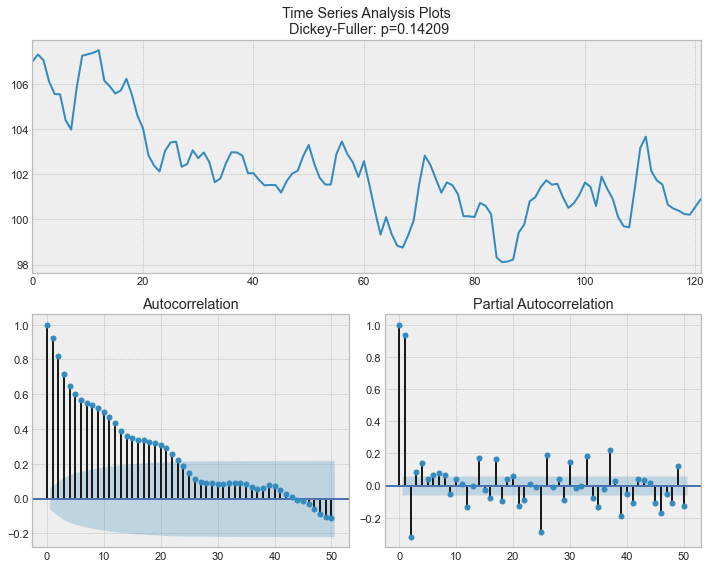

In [100]:
tsplot(df["import_price_index_non_oil"])

## Time Series Analysis (Log Transformation)

In [101]:
focused_columns = ['neer', 'cpi_adjusted', 'export_price_index', 'import_price_index', 'import_price_index_non_oil']
for column in focused_columns:
    if column in df.columns.values.tolist():
        df[column] = np.log(df[column]+1) 

### NEER (Log)

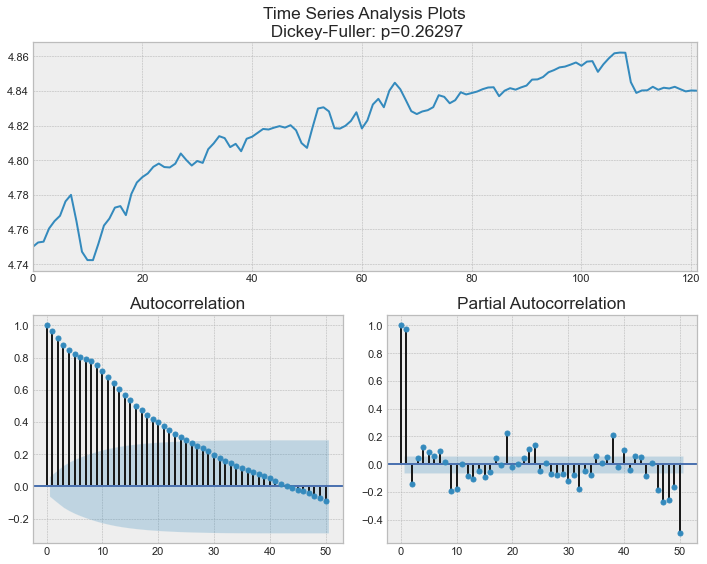

In [51]:
tsplot(df["neer"])

### CPI Adjusted (Log)

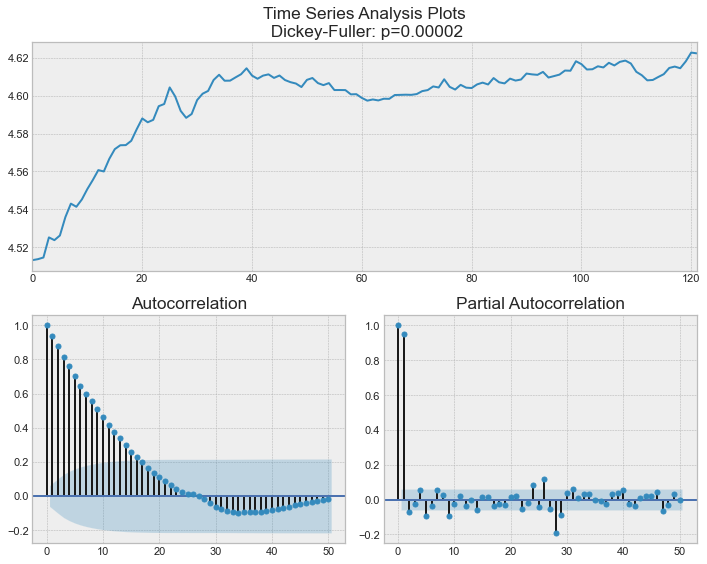

In [52]:
tsplot(df["cpi_adjusted"])

### Export Price Index (Log)

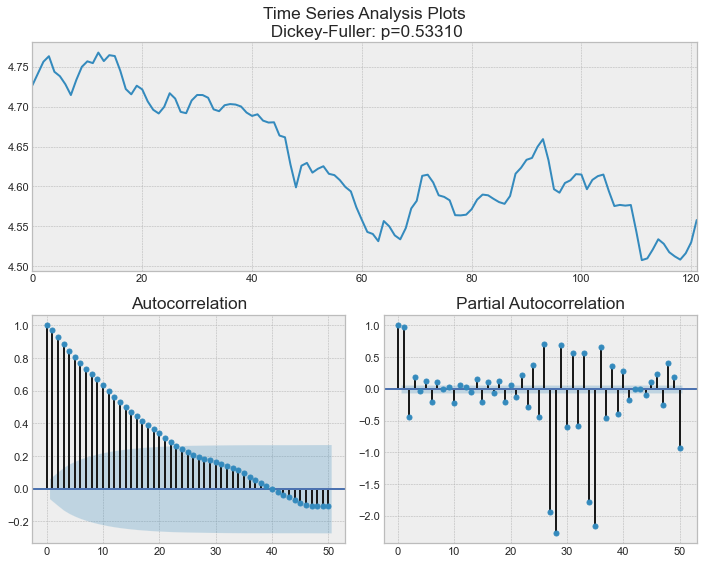

In [53]:
tsplot(df["export_price_index"])

### Import Price Index (Log)


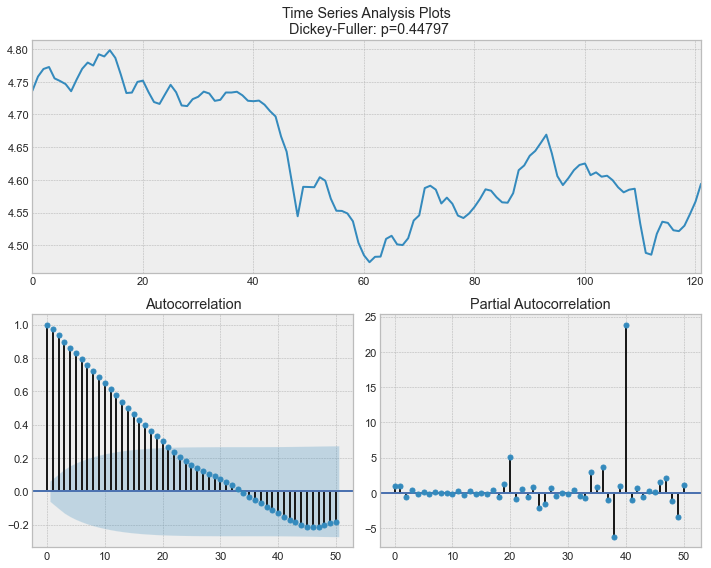

In [102]:
tsplot(df["import_price_index"])

### Non-Oil Import Price Index (Log)

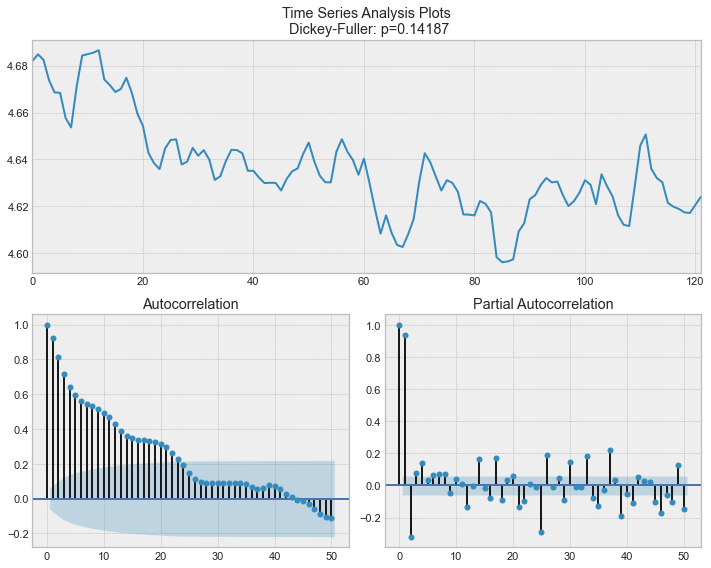

In [103]:
tsplot(df["import_price_index_non_oil"])

## Differencing

In [104]:
focused_columns_diff = ['neer', 'export_price_index', 'import_price_index', 'import_price_index_non_oil']
for column in focused_columns_diff:
    if column in df.columns.values.tolist():
        df[column] = df[column].diff().dropna()

In [105]:
df = df.dropna()
df.head()

date      neer  cpi_adjusted  export_price_index  import_price_index  \
1 2011-01-02  0.002636      4.513724            0.014719            0.021490   
2 2011-01-03  0.000475      4.514600            0.014704            0.011614   
3 2011-01-04  0.007588      4.525217            0.006896            0.002982   
4 2011-01-05  0.004288      4.523765           -0.019543           -0.017355   
5 2011-01-06  0.003085      4.526214           -0.005535           -0.004062   

   export_price_index_machinery  export_price_index_manufactured  \
1                       111.333                          111.804   
2                       109.971                          111.402   
3                       109.169                          111.878   
4                       108.145                          109.083   
5                       107.614                          107.452   

   export_price_index_chem  export_price_index_misc_manufactured  \
1                  105.348                                97.977   
2                  106.163                                98.354   
3                  106.324                                97.863   
4                  105.877                                97.459   
5                  105.572                                98.034   

   export_price_index_mineral_fuels  ...  import_price_index_footwear  \
1                           130.476  ...                       94.443   
2                           142.362  ...                       94.413   
3                           148.487  ...                       94.385   
4                           140.853  ...                       96.168   
5                           139.510  ...                       95.777   

   cpi_adjusted_footwear  import_price_index_plumbing&lighting  \
1                 94.861                                95.845   
2                 95.329                                95.779   
3                 94.530                                95.510   
4                 93.879                                95.464   
5                 93.213                                95.454   

   import_price_index_furniture  import_price_index_electrical  \
1                        98.584                        107.688   
2                        99.111                        107.130   
3                        99.415                        106.644   
4                        99.494                        105.838   
5                        99.371                        105.899   

   cpi_adjusted_household_durables  import_price_index_communication  \
1                           85.976                           186.561   
2                           86.238                           186.661   
3                           88.010                           170.264   
4                           88.758                           170.089   
5                           88.773                           170.033   

   cpi_adjusted_communication  import_price_index_beverages&tobacco  \
1                     103.532                                94.729   
2                     103.131                                94.222   
3                     103.074                                93.889   
4                     103.077                                93.677   
5                     102.951                                93.250   

   cpi_adjusted_misc  
1             94.048  
2             94.193  
3             94.190  
4             94.097  
5             94.222  

[5 rows x 31 columns]

###  NEER (Log + Diff)

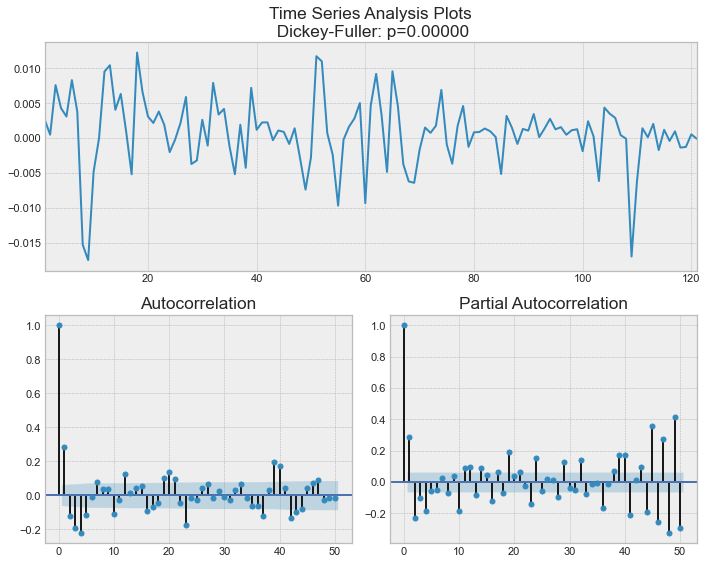

In [57]:
tsplot(df["neer"])

### Export Price Index (Log + Diff)

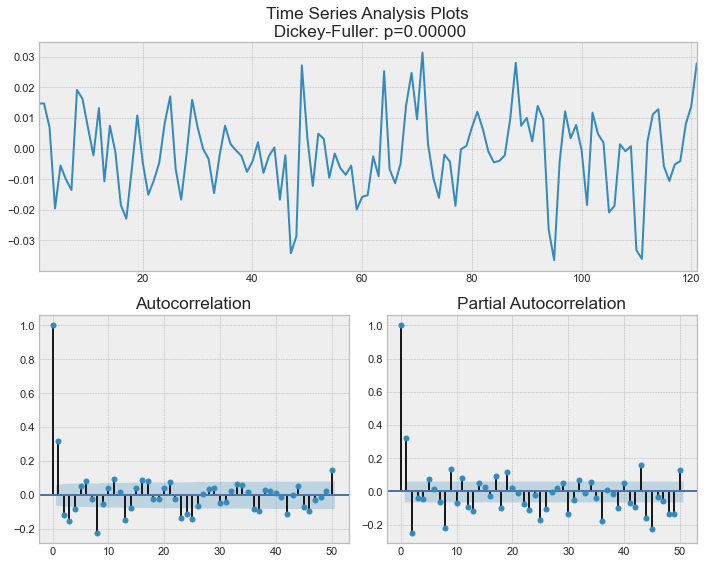

In [60]:
tsplot(df["export_price_index"])

### Import Price Index (Log + Diff)

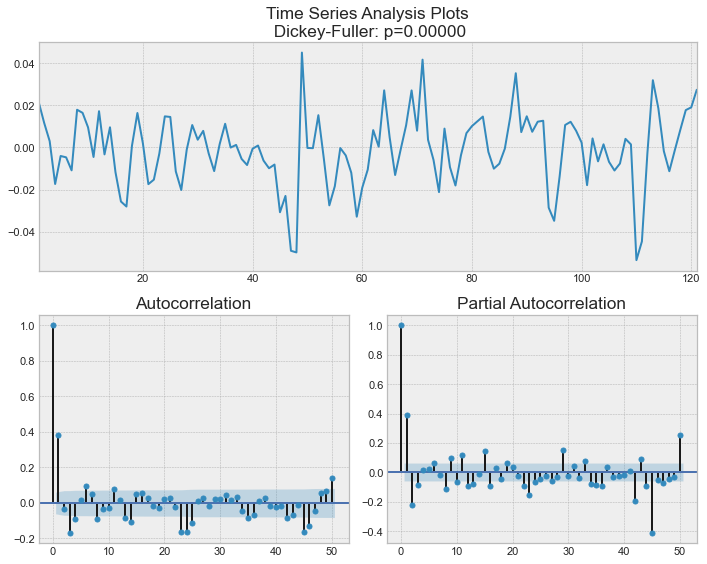

In [61]:
tsplot(df["import_price_index"])

### Non-Oil Import Price Index (Log + Diff)

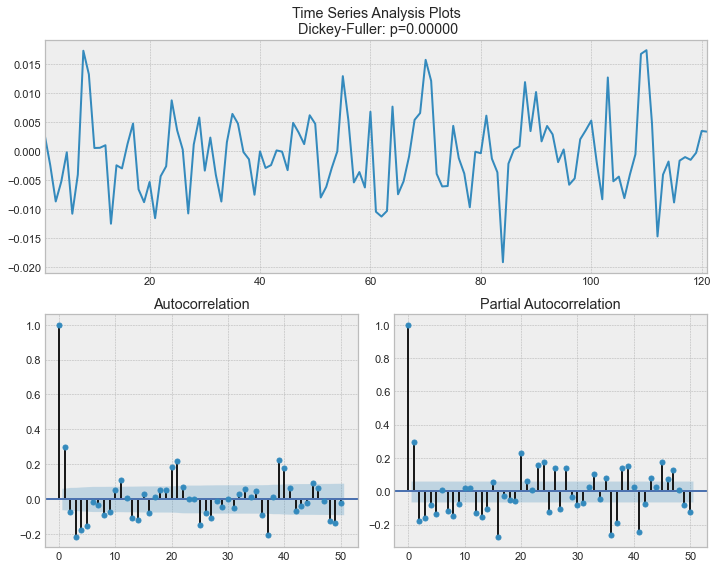

In [106]:
tsplot(df["import_price_index_non_oil"])

## Var Model Set Up

In [107]:
model = VAR(df[focused_columns])
print(model.select_order(10).summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -48.82      -48.70   6.280e-22      -48.77
1      -52.20*     -51.47*  2.136e-23*     -51.90*
2       -52.05      -50.71   2.487e-23      -51.51
3       -51.88      -49.93   2.968e-23      -51.09
4       -51.67      -49.10   3.724e-23      -50.63
5       -51.47      -48.30   4.624e-23      -50.19
6       -51.31      -47.52   5.642e-23      -49.77
7       -51.09      -46.70   7.321e-23      -49.31
8       -51.04      -46.04   8.170e-23      -49.01
9       -50.78      -45.16   1.157e-22      -48.50
10      -51.06      -44.83   9.703e-23      -48.53
--------------------------------------------------


In [108]:
def write_results(file_name, results, columns):
    with open(file_name,"w") as fw:
        print(results.summary(), file=fw)
        fw.write("================test_whiteness================\n")
        print(results.test_whiteness(), file=fw)
        fw.write("================results.roots()================\n")
        for root in results.roots:
            fw.write(str(root)+",")
        fw.write("\n================is_stable================\n")
        fw.write(str(results.is_stable()))
        fw.write("\n================granger causality================\n")
        for V1 in columns:
            for V2 in columns:
                fw.write("Granger test: "+V2+"-->"+V1+"\n")
                print(results.test_causality(V1, [V2],kind='f').summary(), file=fw)
                fw.write("\n")

        fw.write("\n================long_run effects================\n")
        for effect in results.long_run_effects():
            fw.write(str(effect)+",")
        fw.write("\n================FEVD values================\n")
        print(results.fevd(20).summary,file=fw)

def structural_analyses(file_name, results, lag=20):

    # impulse response analyses
    irf = results.irf(lag)
    fig1 = irf.plot(orth=False)
    plt.savefig(file_name+"_irf_noorth.png")
    # irf.plot(impulse='V1', response="V2")
    fig2 = irf.plot_cum_effects(orth=False)
    plt.savefig(file_name+"_irf_cum_noorth.png")
    results.long_run_effects()

    # forecast error decomposition
    results.fevd(lag).plot()
    plt.savefig(file_name+"_fevd.png")
    fig1.set_figheight(20)
    fig1.set_figwidth(25)
    fig2.set_figheight(20)
    fig2.set_figwidth(25)

In [109]:
orders = [1]
for o in orders:
    print(f'Order: {o}')
    results = model.fit(o)
    print(results.is_stable())
    print(results.test_whiteness())
    print()


Order: 1
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 230.650, critical value: 260.992>, p-value: 0.384>



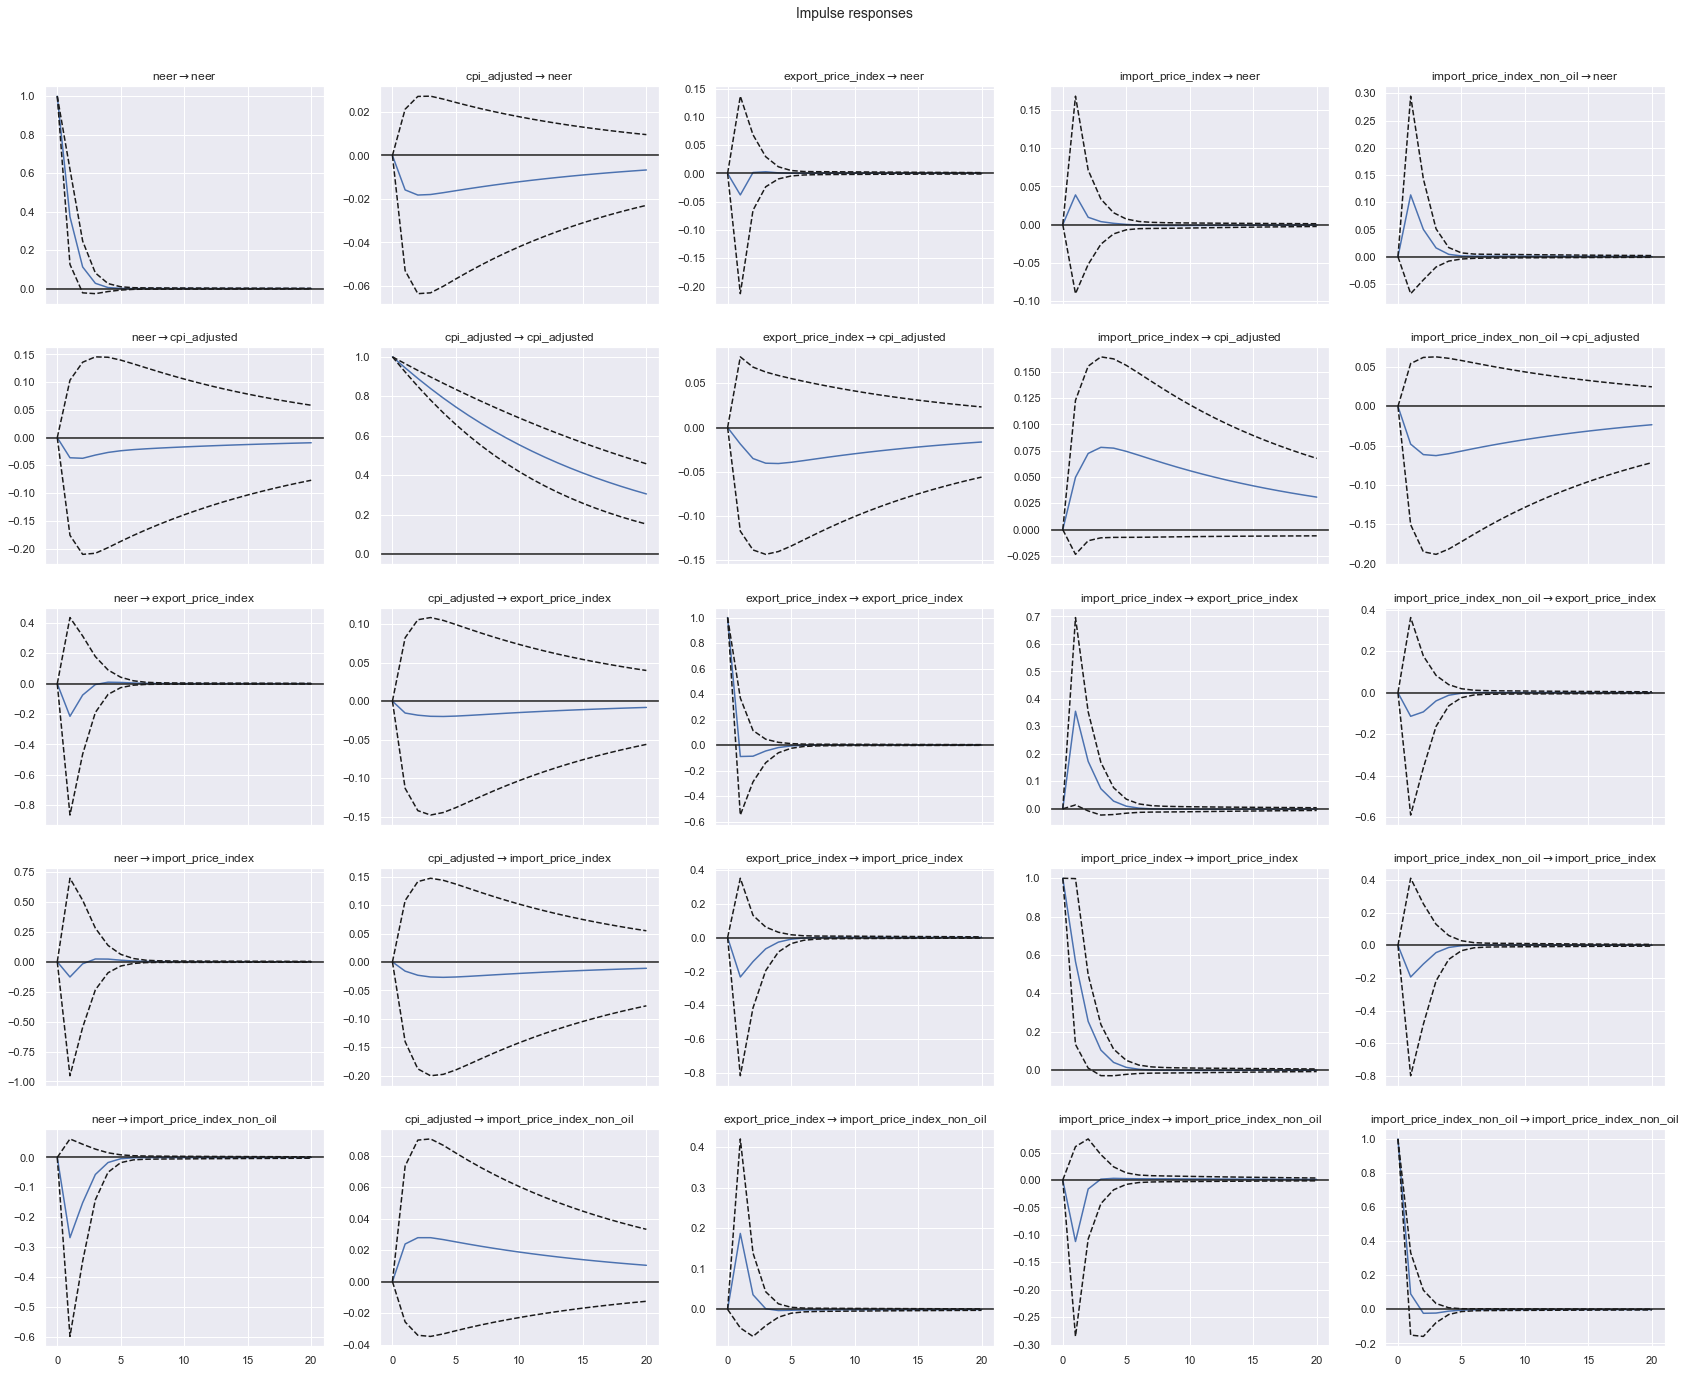

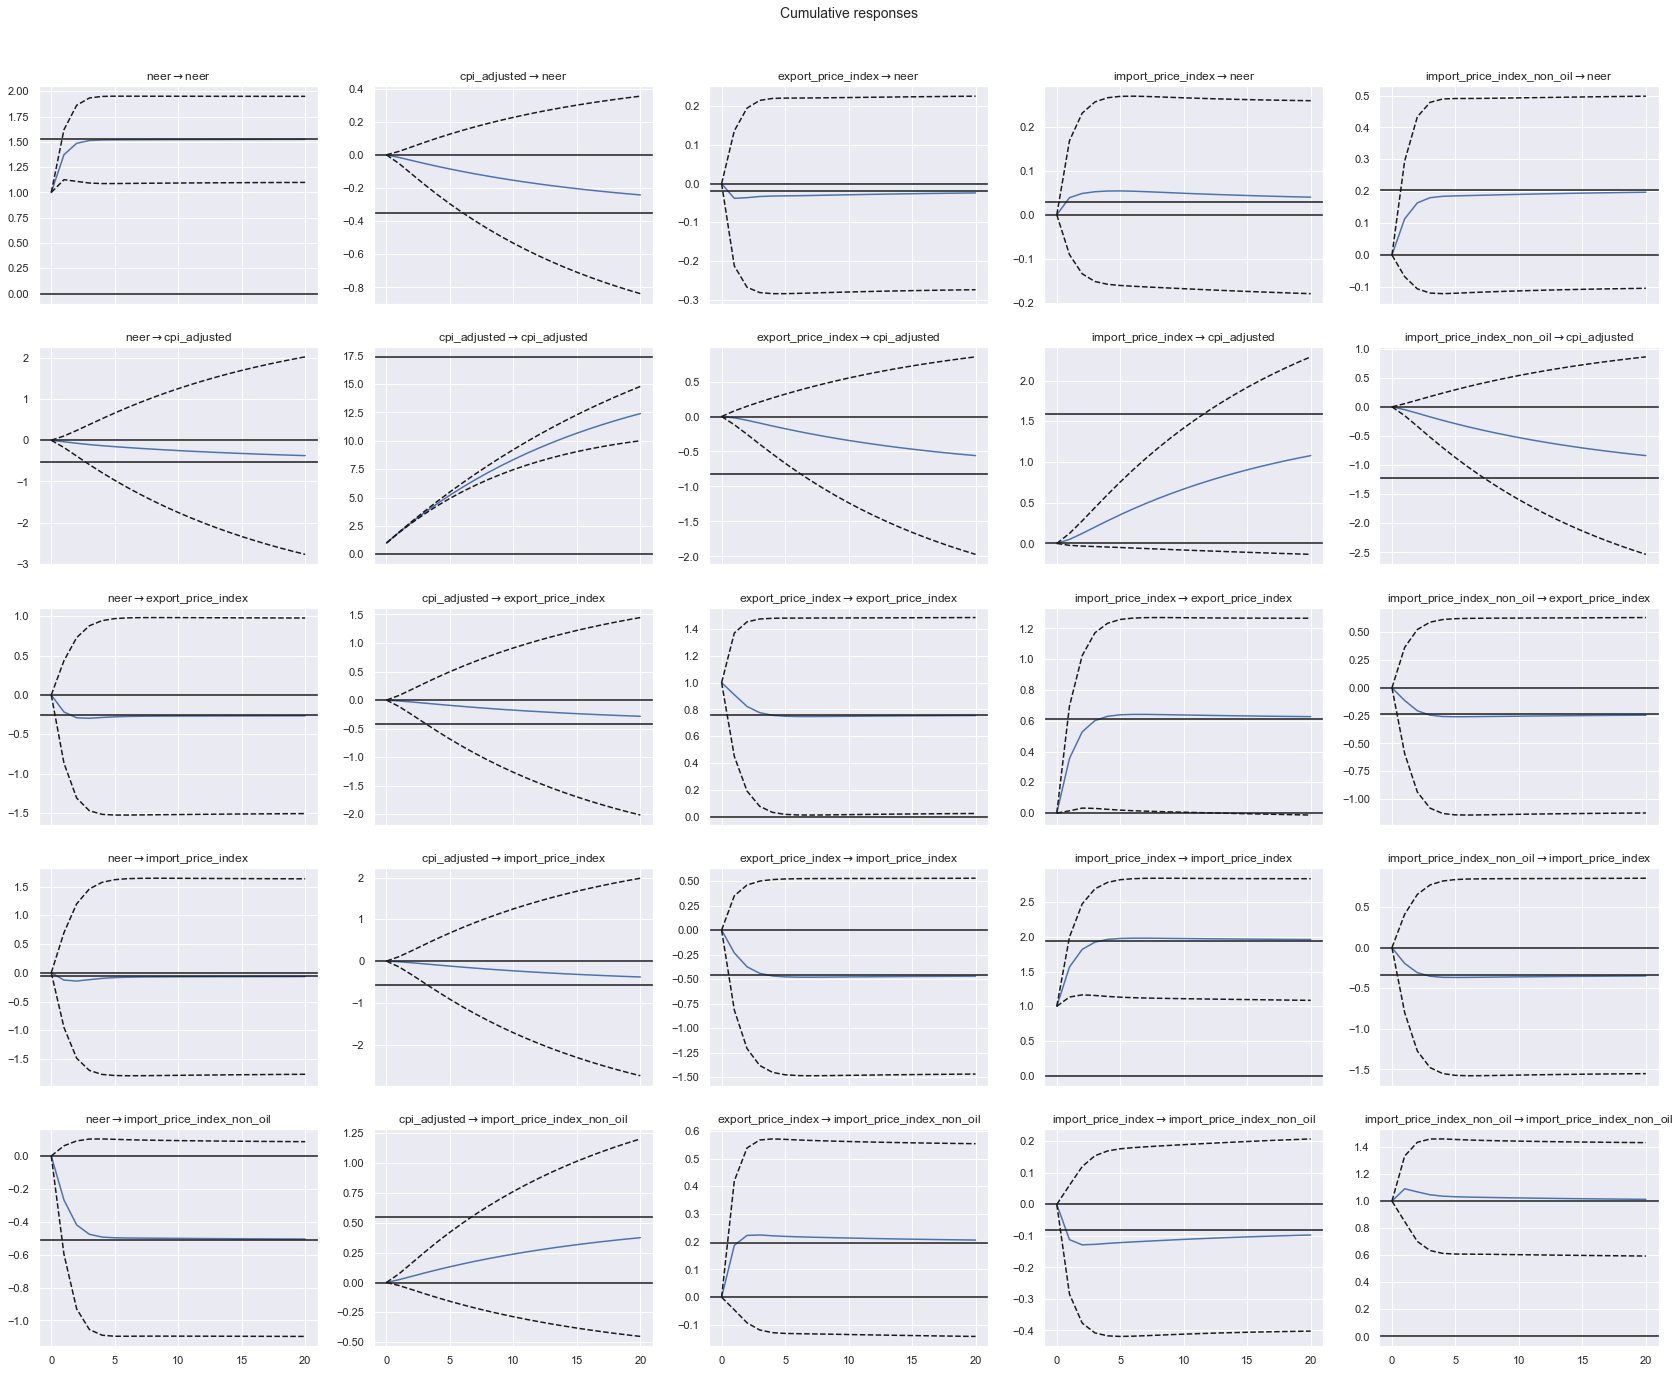

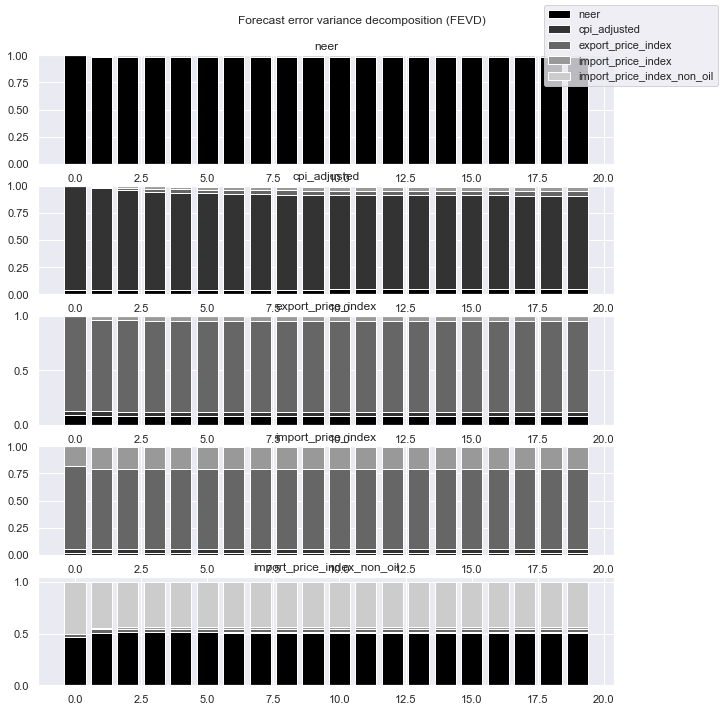

In [110]:
selected_order = 1
results = model.fit(selected_order,trend="c")
results_file = 'results_lag'+str(selected_order)+'.txt'
structual_file = 'lag'+str(selected_order)
columns = df[focused_columns].columns.values.tolist()
write_results(results_file, results, columns)
structural_analyses(structual_file, results, 20)

### Drilling down to specific import and cpi categories

In [61]:
df_cat = pd.read_excel("Data/NEER_Economic_Indicators.xlsx")
df_cat.head()

date     neer  cpi_adjusted  export_price_index  import_price_index  \
0 2011-01-01  114.565        90.214             111.960             113.030   
1 2011-01-02  114.870        90.261             113.635             115.507   
2 2011-01-03  114.925        90.341             115.333             116.868   
3 2011-01-04  115.808        91.316             116.138             117.220   
4 2011-01-05  116.310        91.182             113.871             115.186   

   export_price_index_machinery  export_price_index_manufactured  \
0                       111.832                          109.235   
1                       111.333                          111.804   
2                       109.971                          111.402   
3                       109.169                          111.878   
4                       108.145                          109.083   

   export_price_index_chem  export_price_index_misc_manufactured  \
0                  104.293                                98.961   
1                  105.348                                97.977   
2                  106.163                                98.354   
3                  106.324                                97.863   
4                  105.877                                97.459   

   export_price_index_mineral_fuels  ...  import_price_index_footwear  \
0                           121.899  ...                       94.518   
1                           130.476  ...                       94.443   
2                           142.362  ...                       94.413   
3                           148.487  ...                       94.385   
4                           140.853  ...                       96.168   

   cpi_adjusted_footwear  import_price_index_plumbing&lighting  \
0                 93.473                                95.891   
1                 94.861                                95.845   
2                 95.329                                95.779   
3                 94.530                                95.510   
4                 93.879                                95.464   

   import_price_index_furniture  import_price_index_electrical  \
0                        98.753                        107.415   
1                        98.584                        107.688   
2                        99.111                        107.130   
3                        99.415                        106.644   
4                        99.494                        105.838   

   cpi_adjusted_household_durables  import_price_index_communication  \
0                           84.130                           186.988   
1                           85.976                           186.561   
2                           86.238                           186.661   
3                           88.010                           170.264   
4                           88.758                           170.089   

   cpi_adjusted_communication  import_price_index_beverages&tobacco  \
0                     103.666                                94.914   
1                     103.532                                94.729   
2                     103.131                                94.222   
3                     103.074                                93.889   
4                     103.077                                93.677   

   cpi_adjusted_misc  
0             94.208  
1             94.048  
2             94.193  
3             94.190  
4             94.097  

[5 rows x 31 columns]

### Import Price Index Categories

### Food Import Price Index

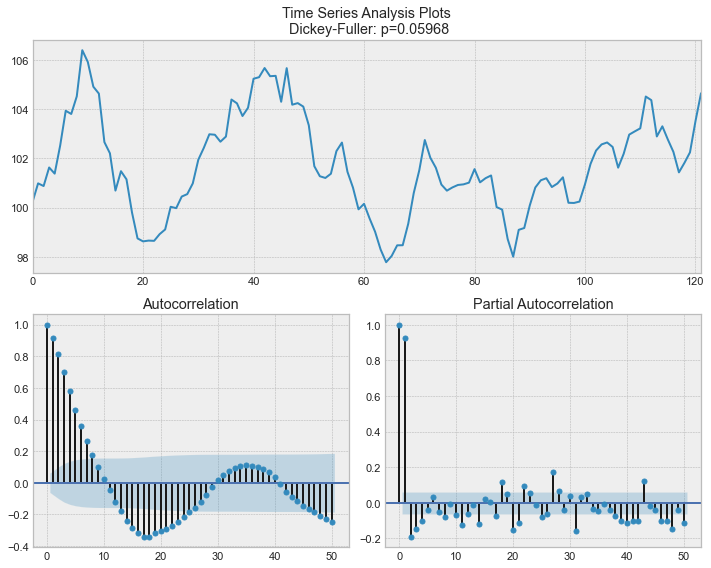

In [8]:
tsplot(df_cat["import_price_index_food"])

### Clothing Import Price Index

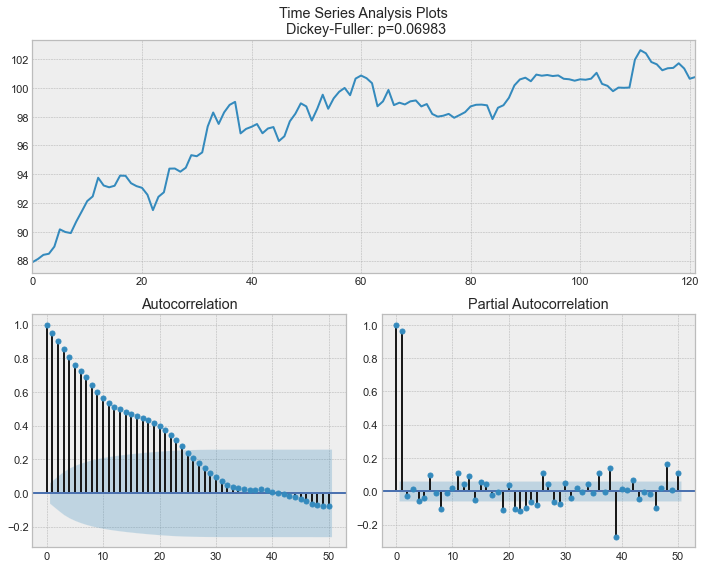

In [9]:
tsplot(df_cat["import_price_index_clothing"])

### Footwear Import Price Index

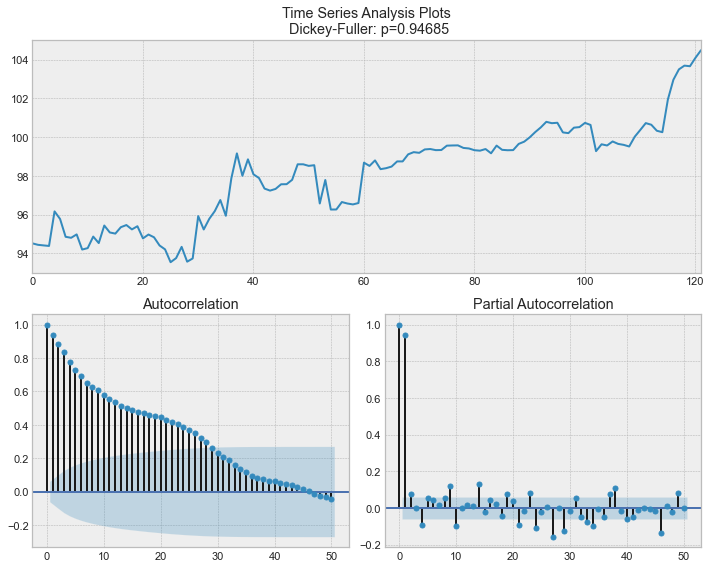

In [10]:
tsplot(df_cat["import_price_index_footwear"])

### Plumbing & Lighting Import Price Index

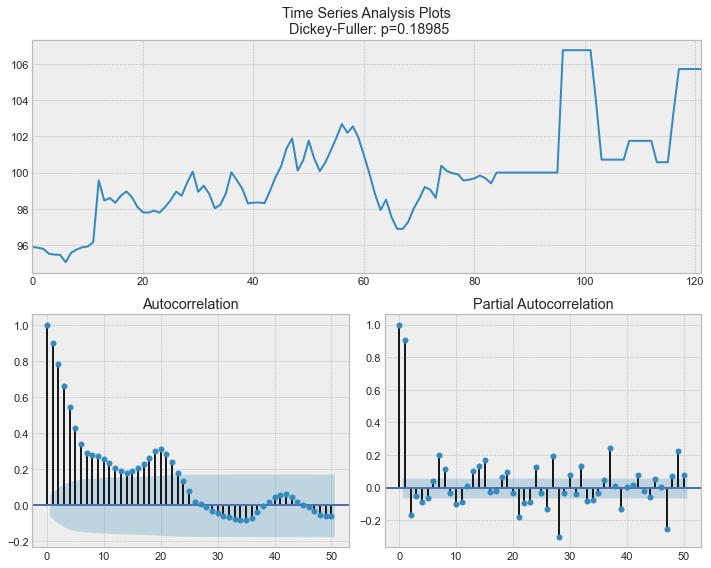

In [11]:
tsplot(df_cat["import_price_index_plumbing&lighting"])

### Furniture Import Price Index

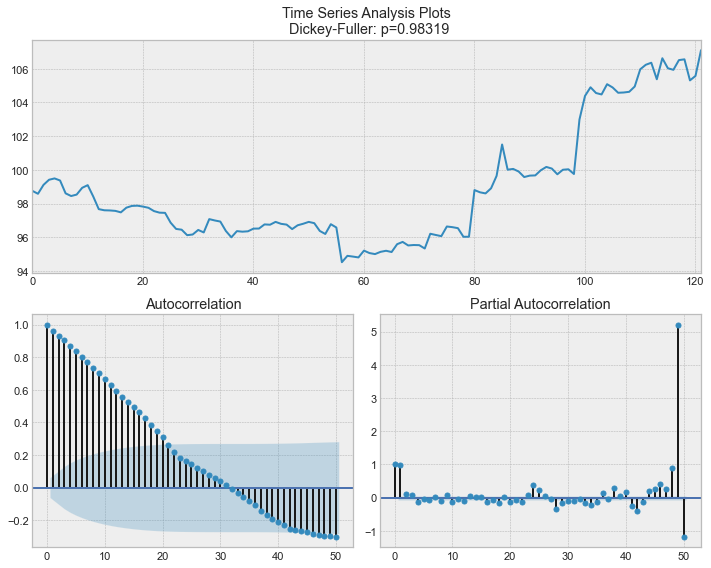

In [12]:
tsplot(df_cat["import_price_index_furniture"])

### Electrical Apparatus Import Price Index

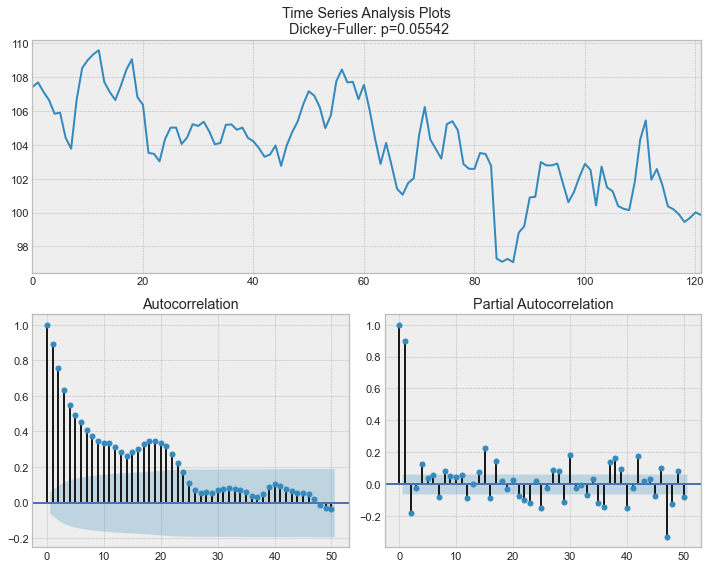

In [13]:
tsplot(df_cat["import_price_index_electrical"])

### Communication Apparatus Import Price Index

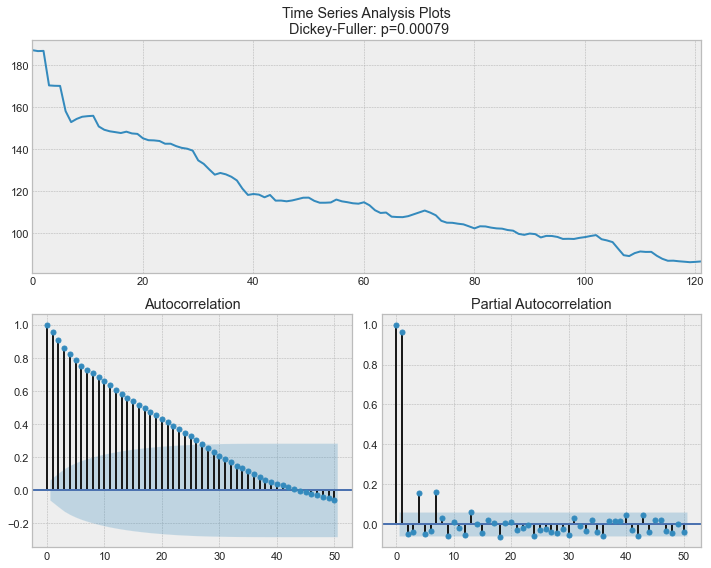

In [14]:
tsplot(df_cat["import_price_index_communication"]) # juz log

### Beverages & Tobacco Import Price Index

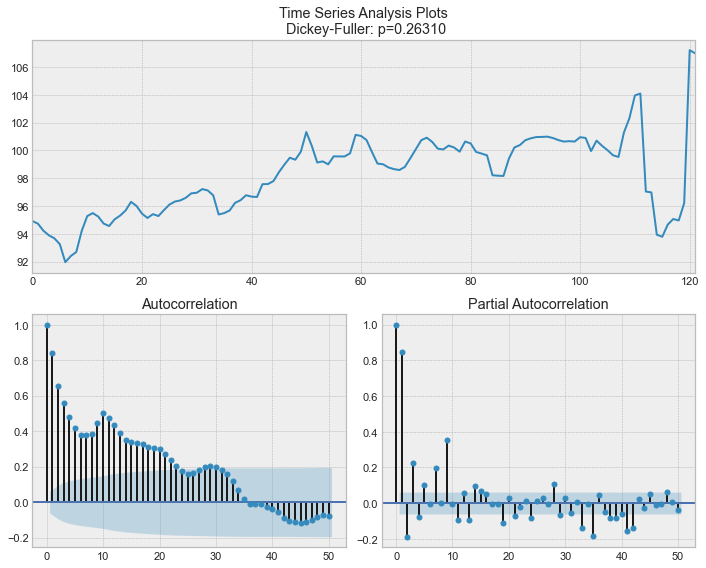

In [15]:
tsplot(df_cat["import_price_index_beverages&tobacco"])

### CPI Price Index Categories

### Food Consumer Price Index

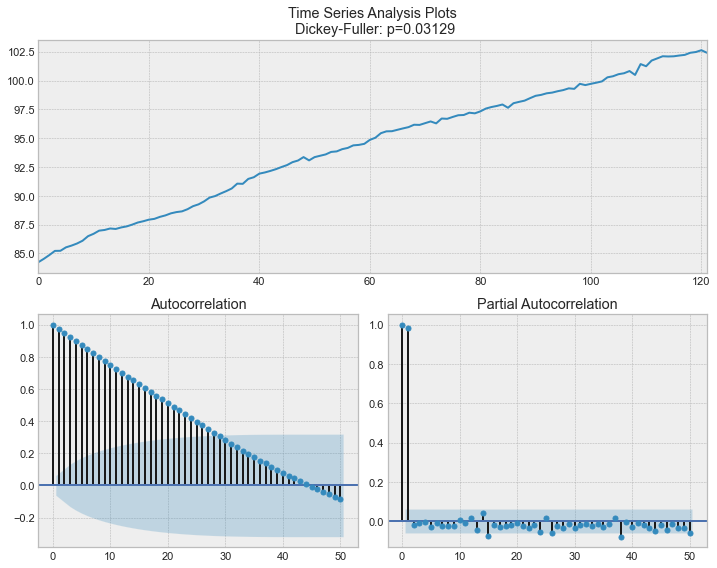

In [26]:
tsplot(df_cat["cpi_adjusted_food"]) # juz log

### Clothing Consumer Price Index

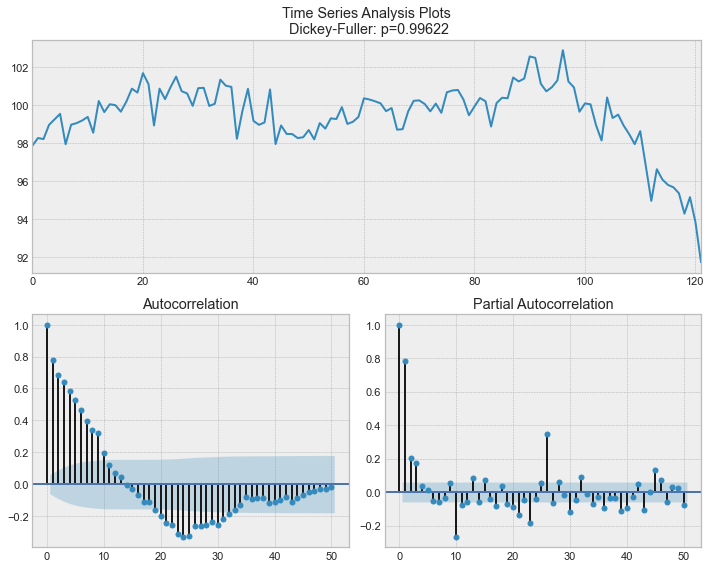

In [27]:
tsplot(df_cat["cpi_adjusted_clothing"])

### Footwear Consumer Price Index

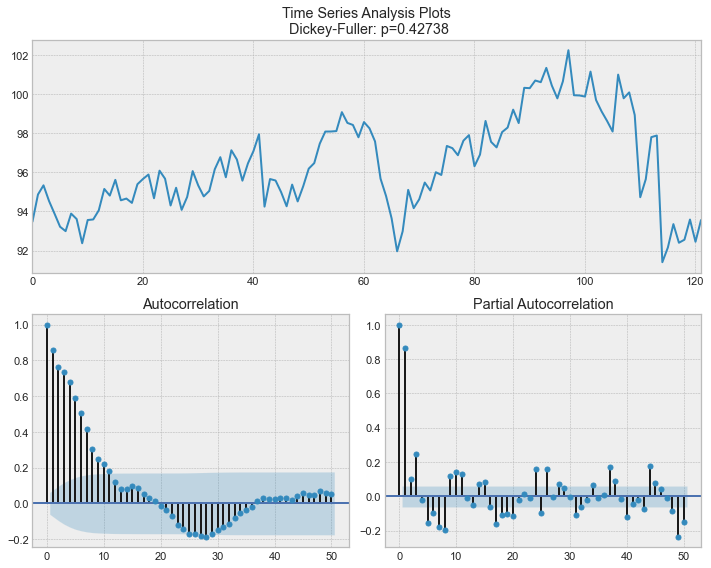

In [28]:
tsplot(df_cat["cpi_adjusted_footwear"])

### Household Durables Consumer Price Index

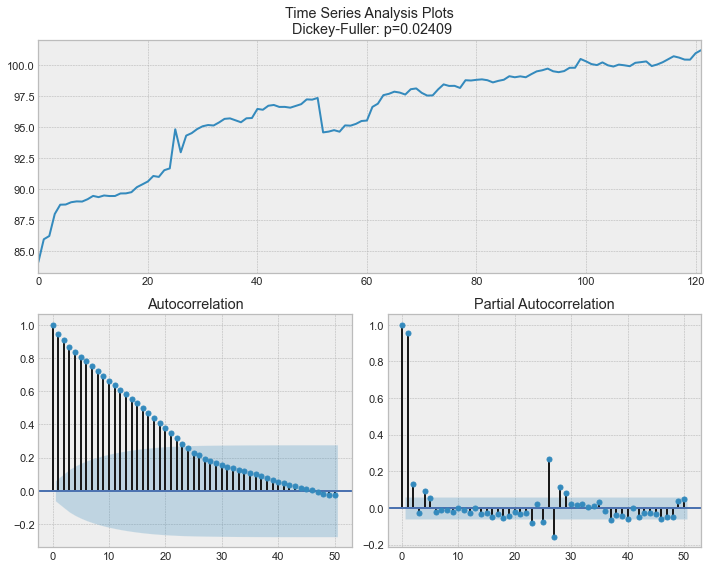

In [29]:
tsplot(df_cat["cpi_adjusted_household_durables"]) # juz log

### Communication Consumer Price Index

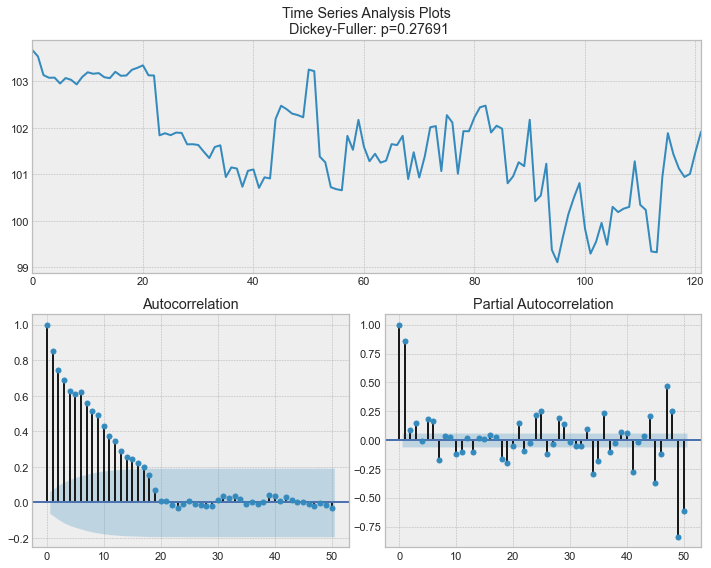

In [30]:
tsplot(df_cat["cpi_adjusted_communication"])

### Misc Consumer Price Index

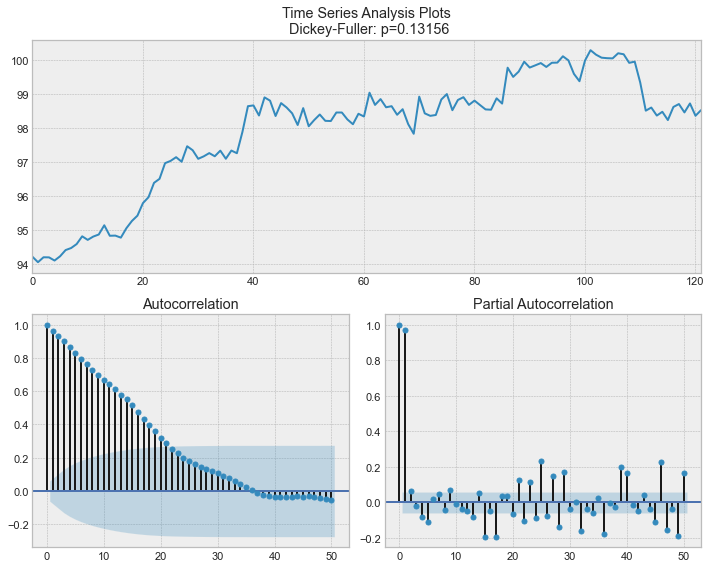

In [31]:
tsplot(df_cat["cpi_adjusted_misc"])

## After Log Transformation


In [62]:
focused_columns = ['neer', 'import_price_index_food', 'import_price_index_clothing', 
                   'import_price_index_footwear', 'import_price_index_plumbing&lighting', 
                   'import_price_index_furniture', 'import_price_index_electrical', 'import_price_index_communication',
                   'import_price_index_beverages&tobacco', 'cpi_adjusted_food', 'cpi_adjusted_clothing',
                   'cpi_adjusted_footwear', 'cpi_adjusted_household_durables', 'cpi_adjusted_communication',
                   'cpi_adjusted_misc']
for column in focused_columns:
    if column in df_cat.columns.values.tolist():
        df_cat[column] = np.log(df_cat[column]+1) 
        

### Import Price Index Categories

### Food Import Price Index (Log)

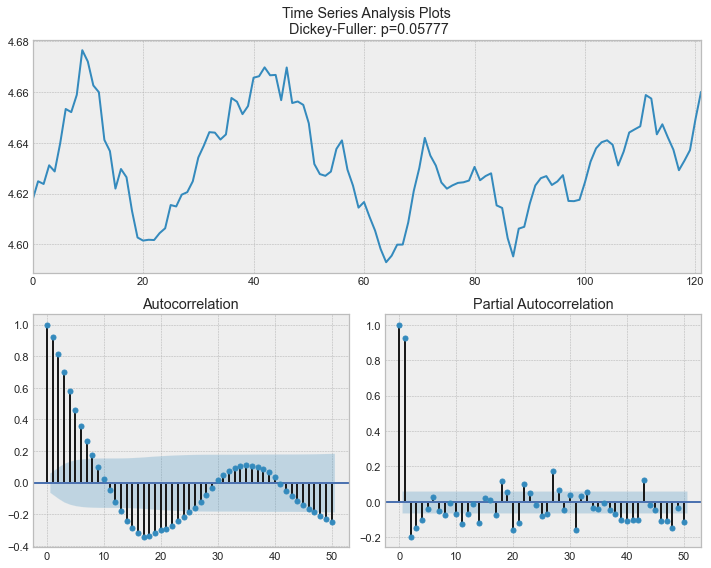

In [18]:
tsplot(df_cat["import_price_index_food"])

### Clothing Import Price Index (Log)

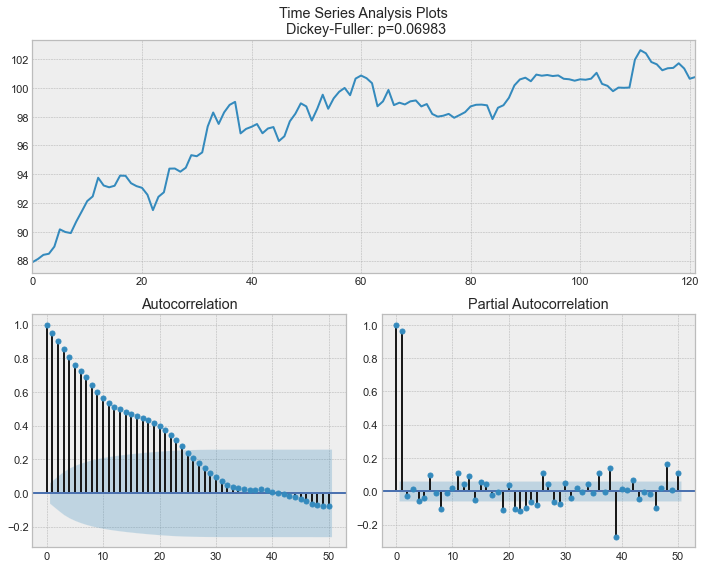

In [19]:
tsplot(df_imports["import_price_index_clothing"])

### Footwear Import Price Index (Log)

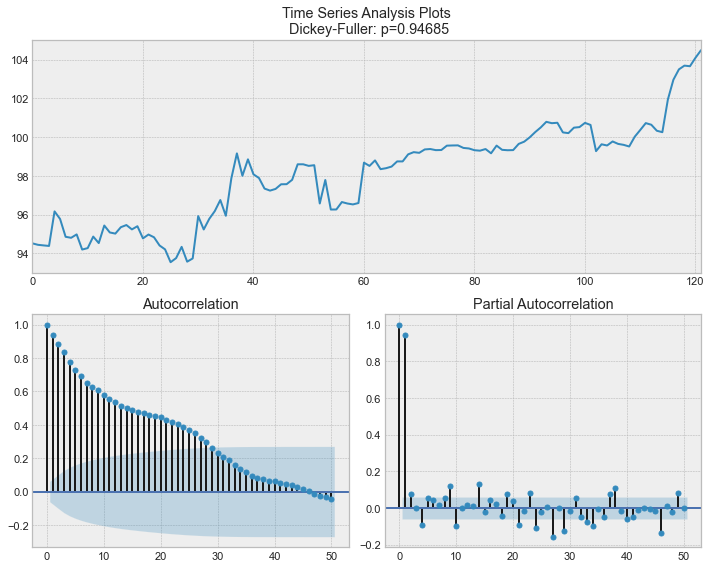

In [20]:
tsplot(df_imports["import_price_index_footwear"])

### Plumbing & Lighting Import Price Index (Log)

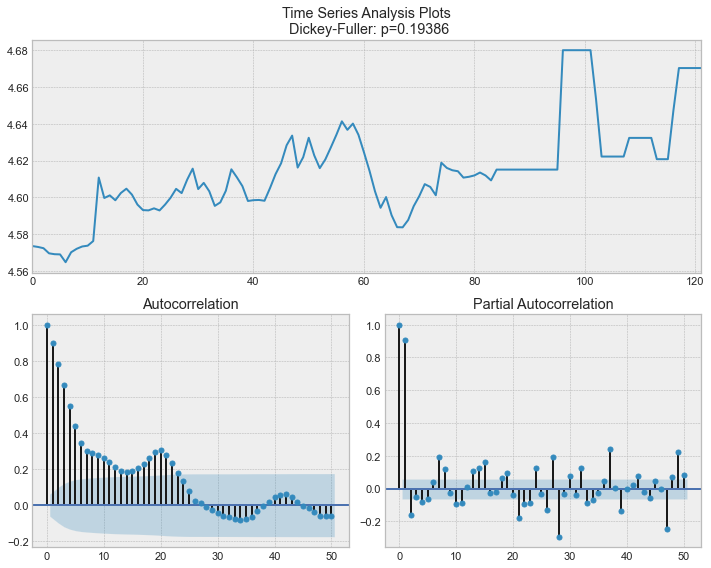

In [21]:
tsplot(df_cat["import_price_index_plumbing&lighting"])

### Furniture Import Price Index (Log)

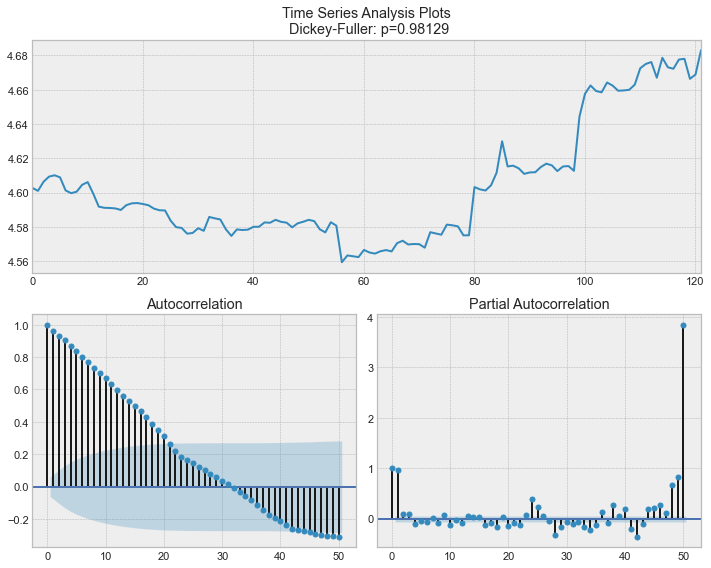

In [22]:
tsplot(df_cat["import_price_index_furniture"])

### Electrical Apparatus Import Price Index (Log)

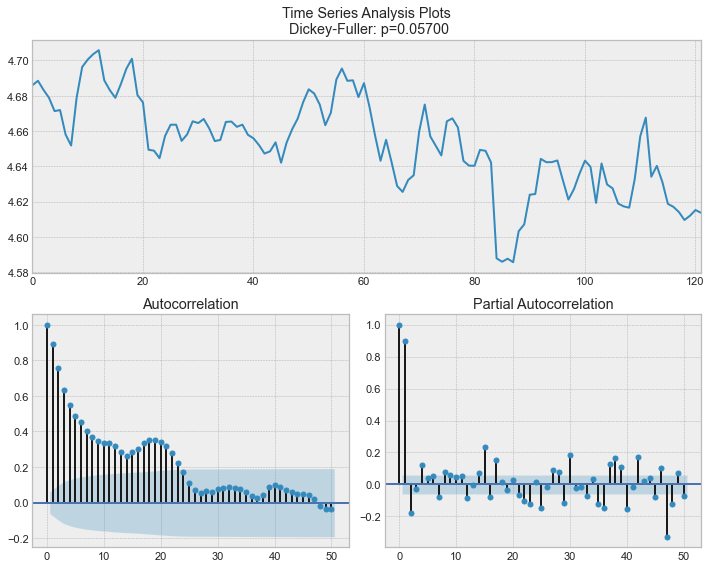

In [23]:
tsplot(df_cat["import_price_index_electrical"])

### Communication Apparatus Import Price Index (Log)

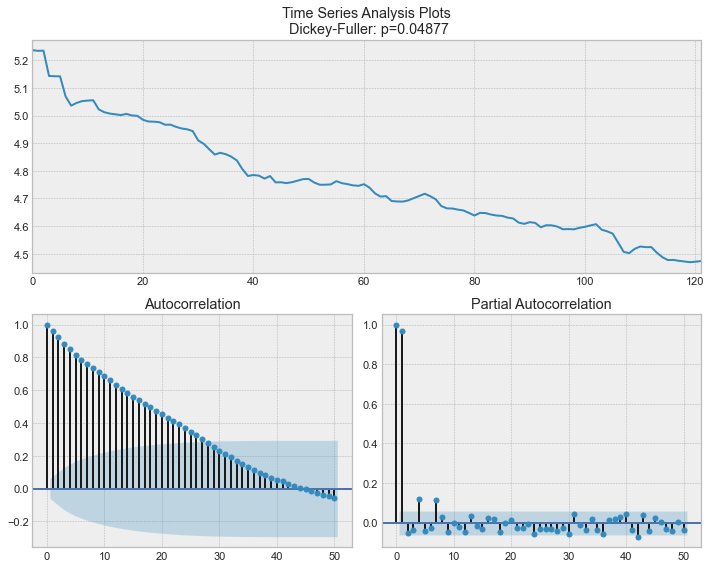

In [24]:
tsplot(df_cat["import_price_index_communication"]) # juz log

### Beverages & Tobacco Import Price Index (Log)

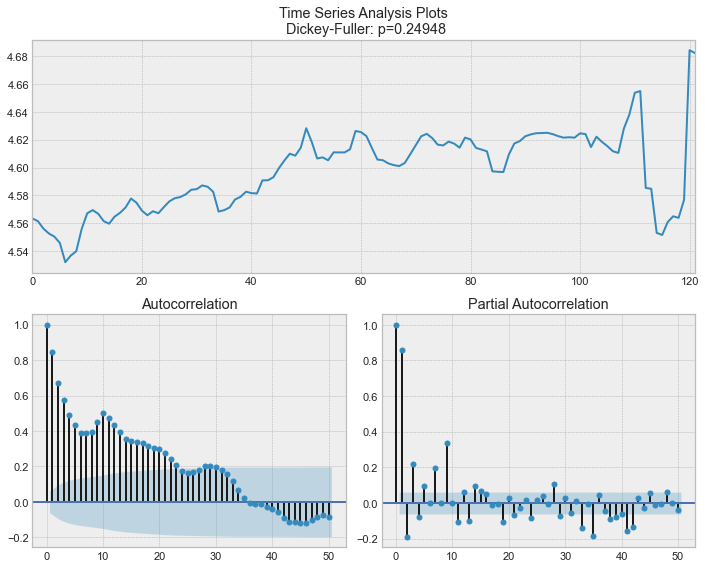

In [25]:
tsplot(df_cat["import_price_index_beverages&tobacco"])

### Consumer Price Index Categories

### Food Consumer Price Index (Log)

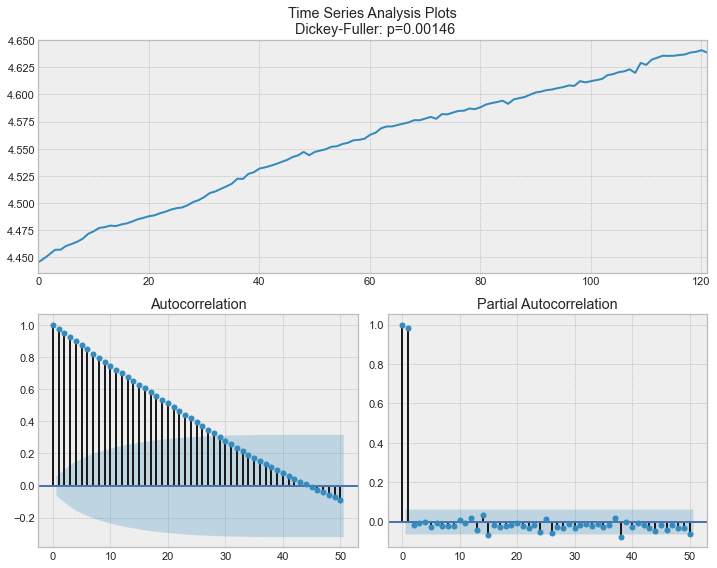

In [34]:
tsplot(df_cat["cpi_adjusted_food"]) # juz log

### Clothing Consumer Price Index (Log)

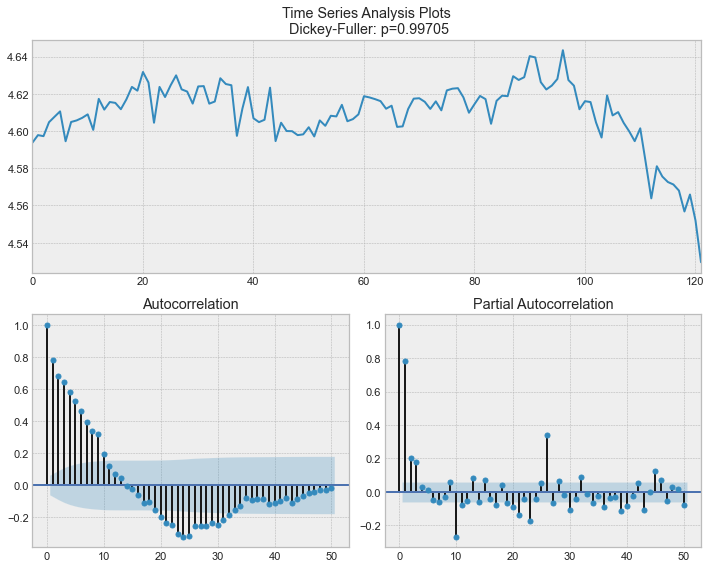

In [35]:
tsplot(df_cat["cpi_adjusted_clothing"]) 

### Footwear Consumer Price Index (Log)

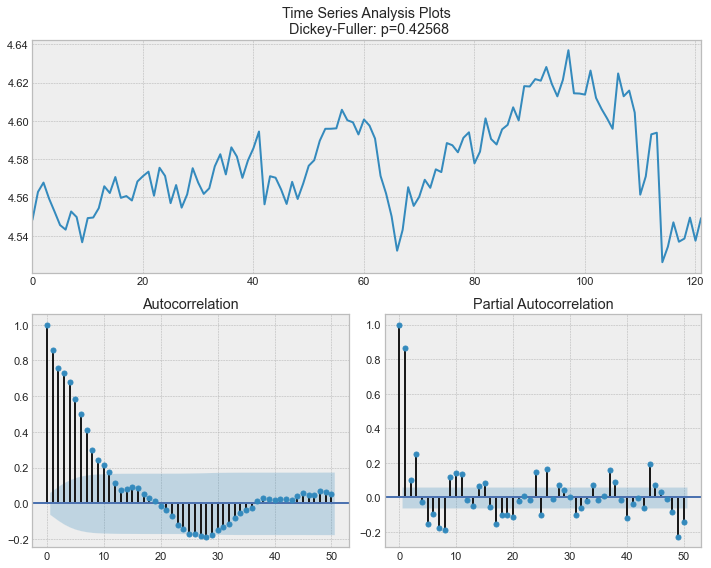

In [36]:
tsplot(df_cat["cpi_adjusted_footwear"]) 

### Household Durables Consumer Price Index

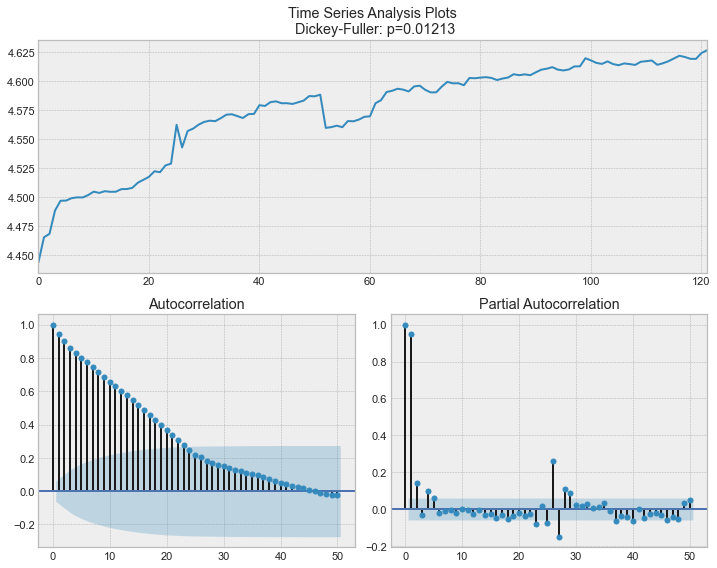

In [37]:
tsplot(df_cat["cpi_adjusted_household_durables"]) # juz log

### Communication Consumer Price Index

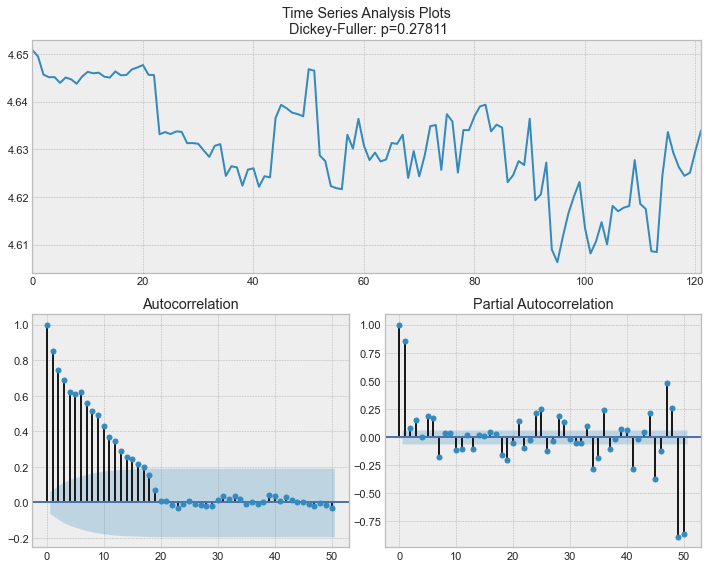

In [38]:
tsplot(df_cat["cpi_adjusted_communication"])

### Misc Consumer Price Index

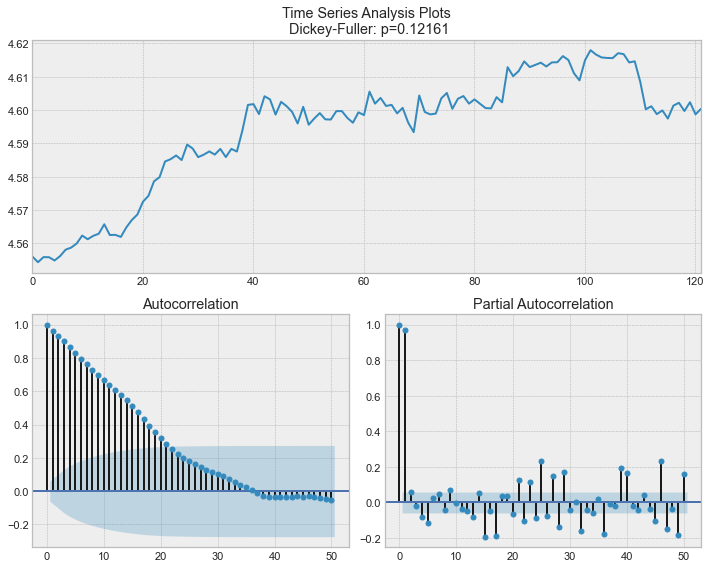

In [39]:
tsplot(df_cat["cpi_adjusted_misc"])

## After Differencing

In [63]:
focused_columns_diff = ['neer', 'import_price_index_food', 'import_price_index_clothing', 
                   'import_price_index_footwear', 'import_price_index_plumbing&lighting', 
                   'import_price_index_furniture', 'import_price_index_electrical',
                   'import_price_index_beverages&tobacco', 'cpi_adjusted_clothing',
                   'cpi_adjusted_footwear', 'cpi_adjusted_communication',
                   'cpi_adjusted_misc']
for column in focused_columns_diff:
    if column in df_cat.columns.values.tolist():
        df_cat[column] = df_cat[column].diff().dropna()

In [65]:
df_cat = df_cat.dropna()

In [66]:
df_cat.head()

date      neer  cpi_adjusted  export_price_index  import_price_index  \
1 2011-01-02  0.002636        90.261             113.635             115.507   
2 2011-01-03  0.000475        90.341             115.333             116.868   
3 2011-01-04  0.007588        91.316             116.138             117.220   
4 2011-01-05  0.004288        91.182             113.871             115.186   
5 2011-01-06  0.003085        91.408             113.237             114.715   

   export_price_index_machinery  export_price_index_manufactured  \
1                       111.333                          111.804   
2                       109.971                          111.402   
3                       109.169                          111.878   
4                       108.145                          109.083   
5                       107.614                          107.452   

   export_price_index_chem  export_price_index_misc_manufactured  \
1                  105.348                                97.977   
2                  106.163                                98.354   
3                  106.324                                97.863   
4                  105.877                                97.459   
5                  105.572                                98.034   

   export_price_index_mineral_fuels  ...  import_price_index_footwear  \
1                           130.476  ...                    -0.000786   
2                           142.362  ...                    -0.000314   
3                           148.487  ...                    -0.000294   
4                           140.853  ...                     0.018520   
5                           139.510  ...                    -0.004032   

   cpi_adjusted_footwear  import_price_index_plumbing&lighting  \
1               0.014585                             -0.000475   
2               0.004870                             -0.000682   
3              -0.008329                             -0.002783   
4              -0.006838                             -0.000477   
5              -0.007044                             -0.000104   

   import_price_index_furniture  import_price_index_electrical  \
1                     -0.001696                       0.002515   
2                      0.005278                      -0.005147   
3                      0.003032                      -0.004505   
4                      0.000786                      -0.007516   
5                     -0.001225                       0.000571   

   cpi_adjusted_household_durables  import_price_index_communication  \
1                         4.465632                          5.234104   
2                         4.468640                          5.234637   
3                         4.488749                          5.143206   
4                         4.497117                          5.142184   
5                         4.497284                          5.141857   

   cpi_adjusted_communication  import_price_index_beverages&tobacco  \
1                   -0.001281                             -0.001931   
2                   -0.003844                             -0.005310   
3                   -0.000548                             -0.003503   
4                    0.000029                             -0.002237   
5                   -0.001211                             -0.004520   

   cpi_adjusted_misc  
1          -0.001682  
2           0.001524  
3          -0.000032  
4          -0.000977  
5           0.001314  

[5 rows x 31 columns]

### Import Price Index Categories

### Food Import Price Index (Log + Diff)

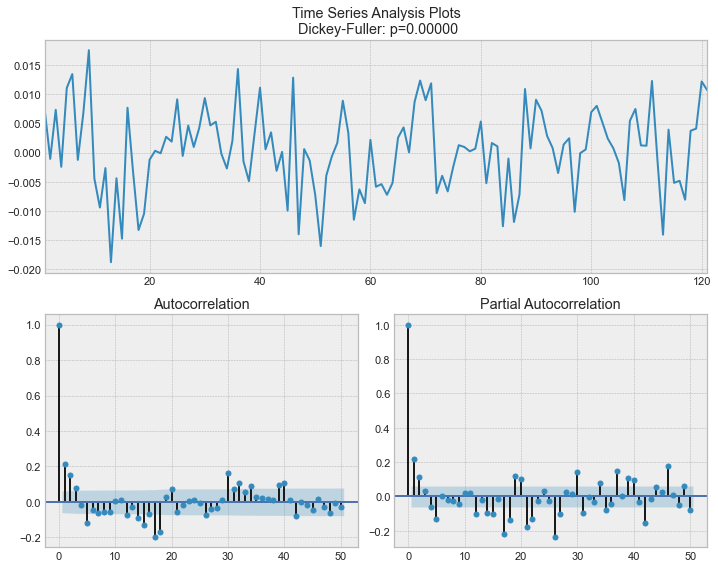

In [43]:
tsplot(df_cat["import_price_index_food"])

### Cloting Import Price Index (Log + Diff)

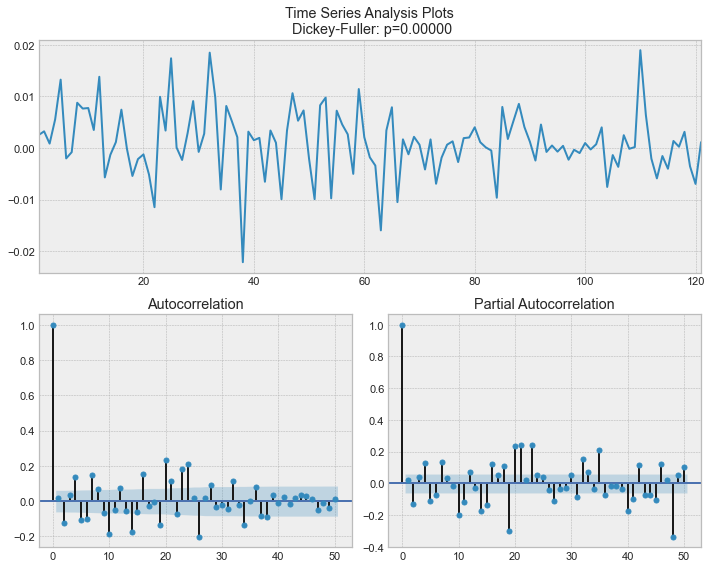

In [45]:
tsplot(df_cat["import_price_index_clothing"])

### Footwear Import Price Index (Log + Diff)

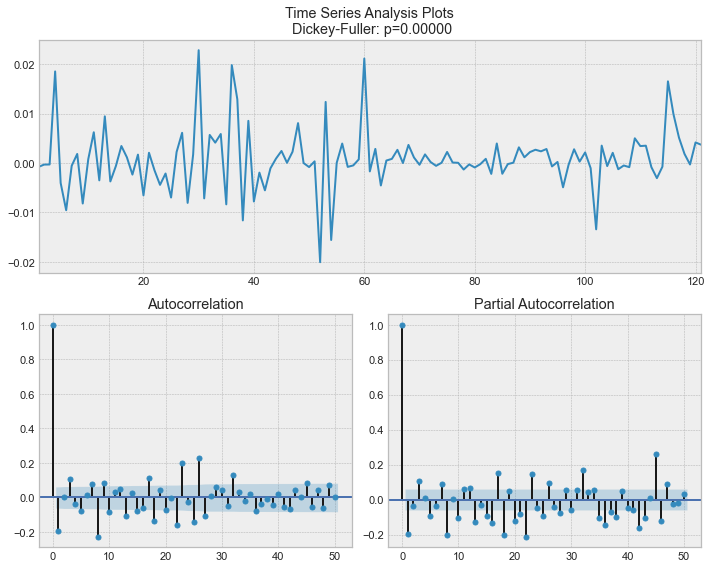

In [47]:
tsplot(df_cat["import_price_index_footwear"])

### Plumbing & Lighting Import Price Index (Log + Diff)

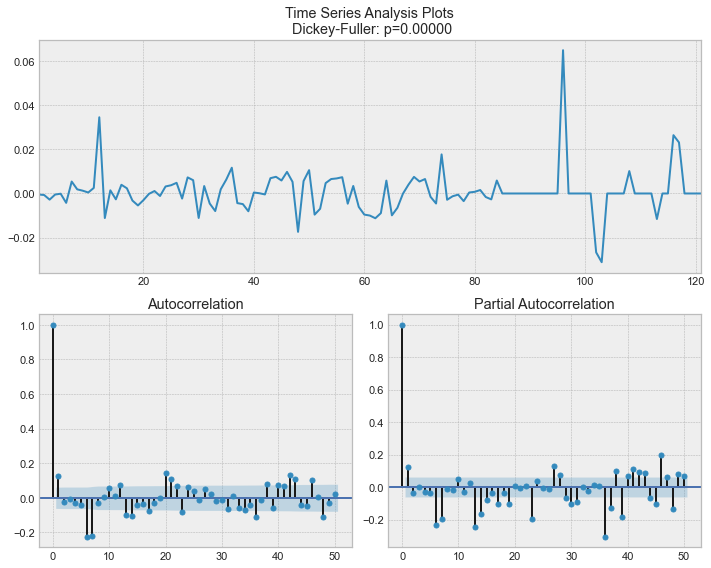

In [49]:
tsplot(df_cat["import_price_index_plumbing&lighting"])

### Furniture Import Price Index (Log + Diff)

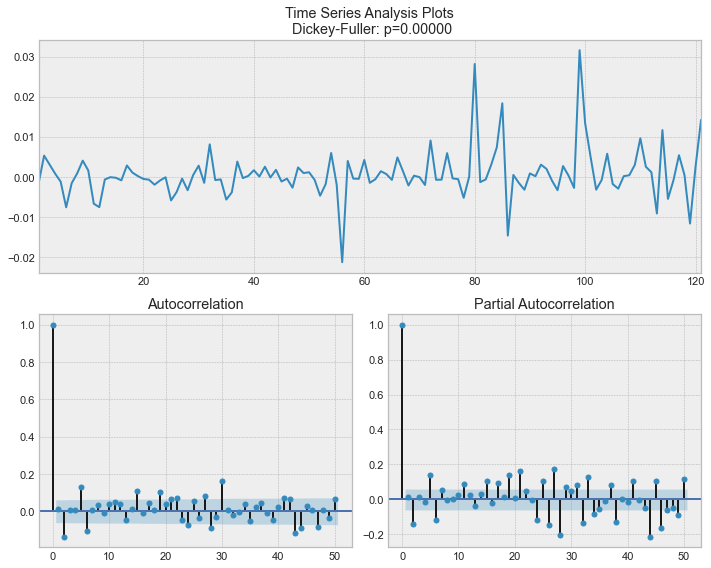

In [50]:
tsplot(df_cat["import_price_index_furniture"])

### Electrical Apparatus Import Price Index (Log + Diff)

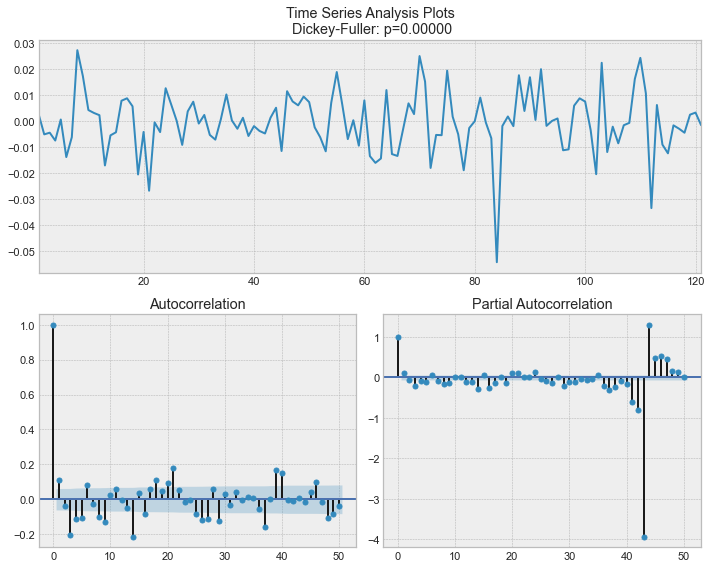

In [51]:
tsplot(df_cat["import_price_index_electrical"])

### Beverages & Tobacco Import Price Index (Log + Diff)

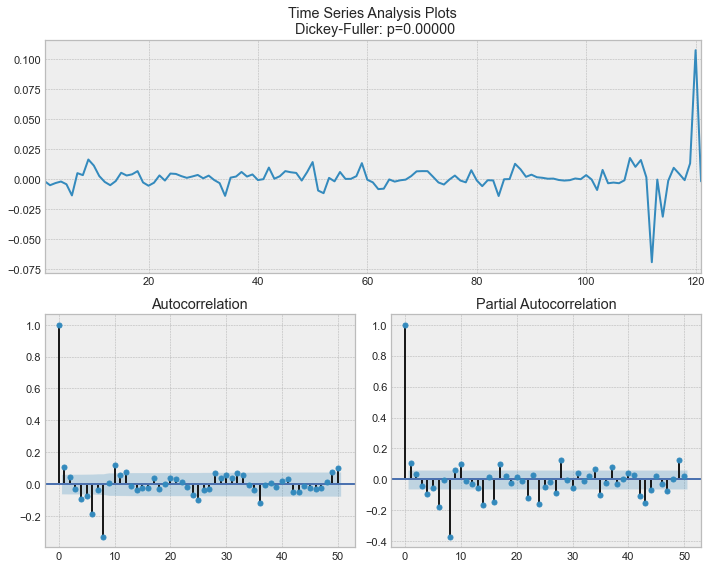

In [52]:
tsplot(df_cat["import_price_index_beverages&tobacco"])

### Consumer Price Index Categories

### Clothing Consumer Price Index (Log + Diff)

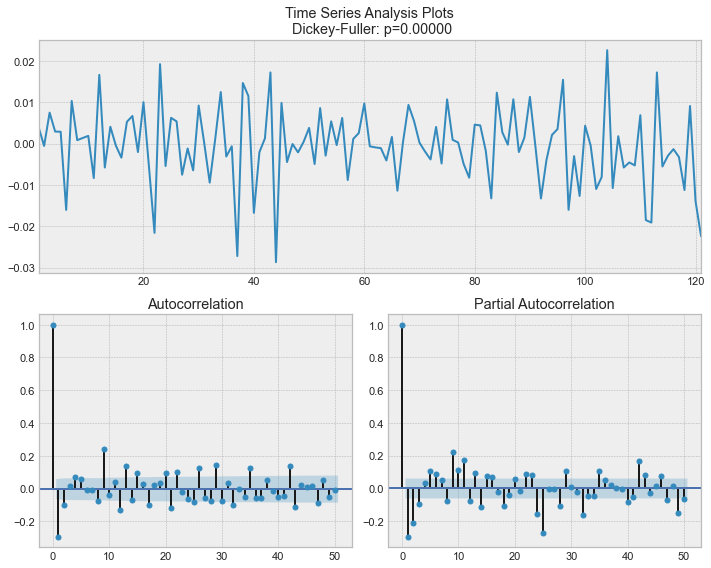

In [54]:
tsplot(df_cat["cpi_adjusted_clothing"]) 

### Footwear Consumer Price Index (Log + Diff)

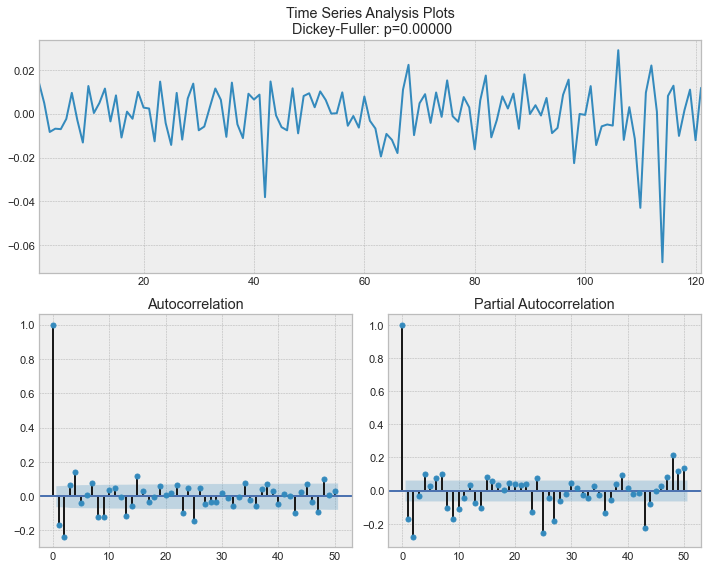

In [55]:
tsplot(df_cat["cpi_adjusted_footwear"]) 

### Communication Consumer Price Index (Log + Diff)

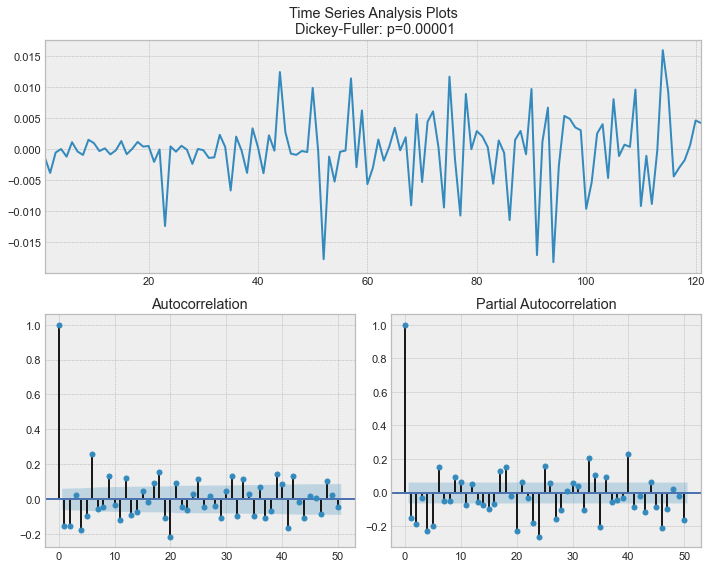

In [56]:
tsplot(df_cat["cpi_adjusted_communication"]) 

### Misc Consumer Price Index (Log + Diff)

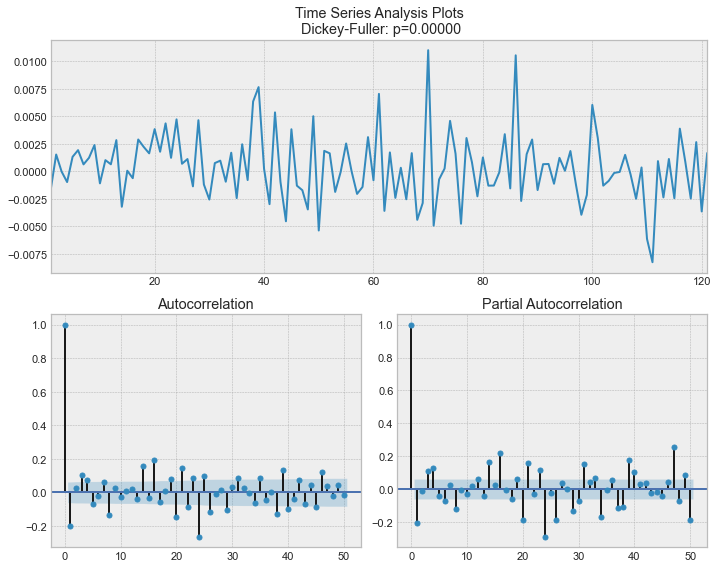

In [57]:
tsplot(df_cat["cpi_adjusted_misc"]) 

## VAR Model Set Up (Heterogeneous Analysis)

In [73]:
model = VAR(df_cat[focused_columns])
print(model.select_order(6).summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -141.6      -141.3   3.098e-62      -141.5
1      -150.9     -145.1*  3.110e-66*     -148.5*
2      -150.4      -139.3   6.026e-66      -145.9
3      -149.7      -133.2   2.064e-65      -143.0
4      -150.2      -128.3   3.689e-65      -141.3
5      -152.0      -124.8   5.533e-65      -140.9
6     -158.2*      -125.6   9.500e-66      -145.0
-------------------------------------------------


In [74]:
orders = [6,1]
for o in orders:
    print(f'Order: {o}')
    results = model.fit(o)
    print(results.is_stable())
    print(results.test_whiteness())
    print()


Order: 6
False
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 2622.284, critical value: 970.904>, p-value: 0.000>

Order: 1
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 1918.017, critical value: 2130.802>, p-value: 0.956>



In [75]:
selected_order = 1
results_cat = model.fit(selected_order)
irf = results_cat.irf(24)

### NEER -> IPI and CPI Categories

### Impulse Response

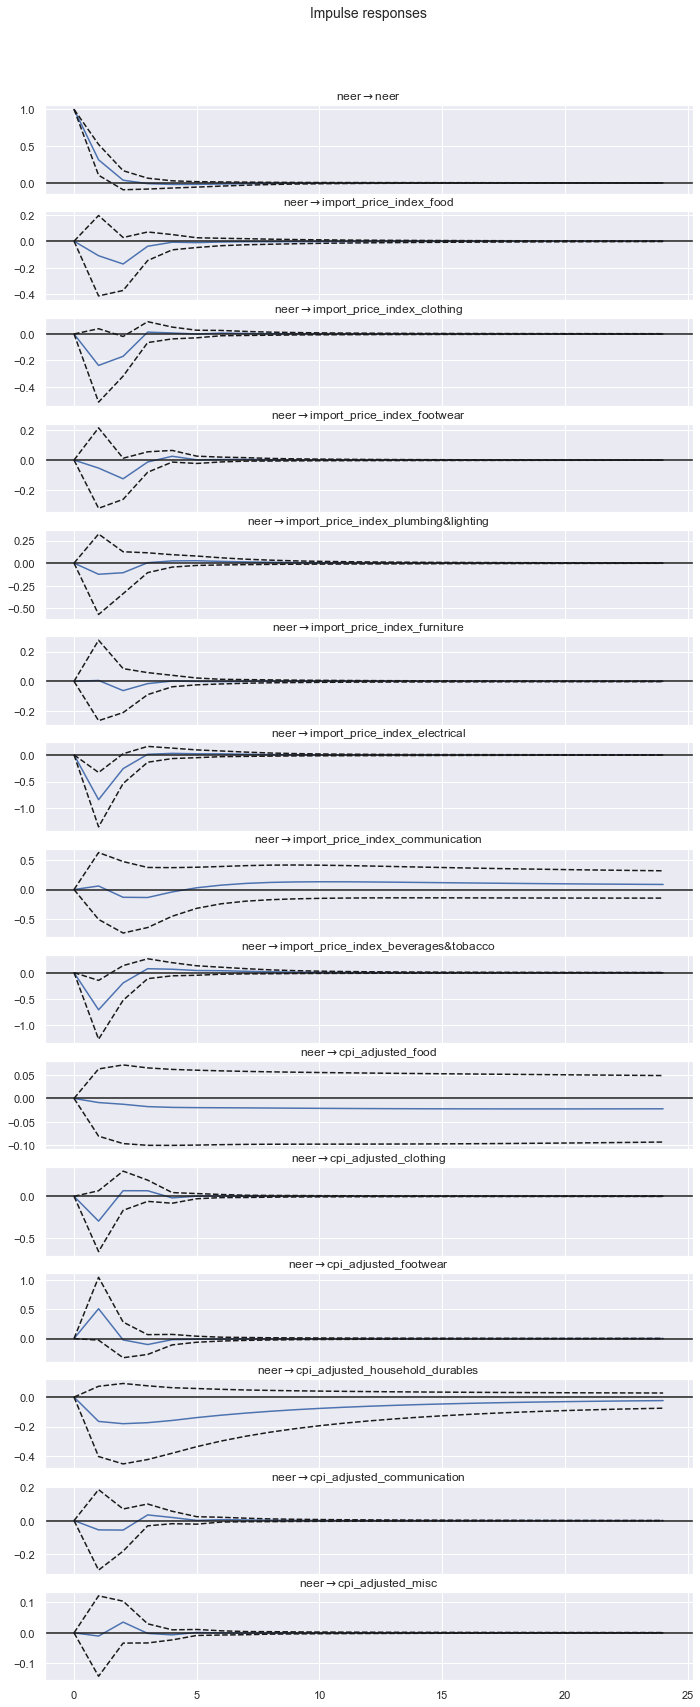

In [79]:
irf_plot = irf.plot(orth=False, impulse = 'neer')

irf_plot.set_figheight(25)
irf_plot.set_figwidth(10)

### Impulse Response (Cumulative)

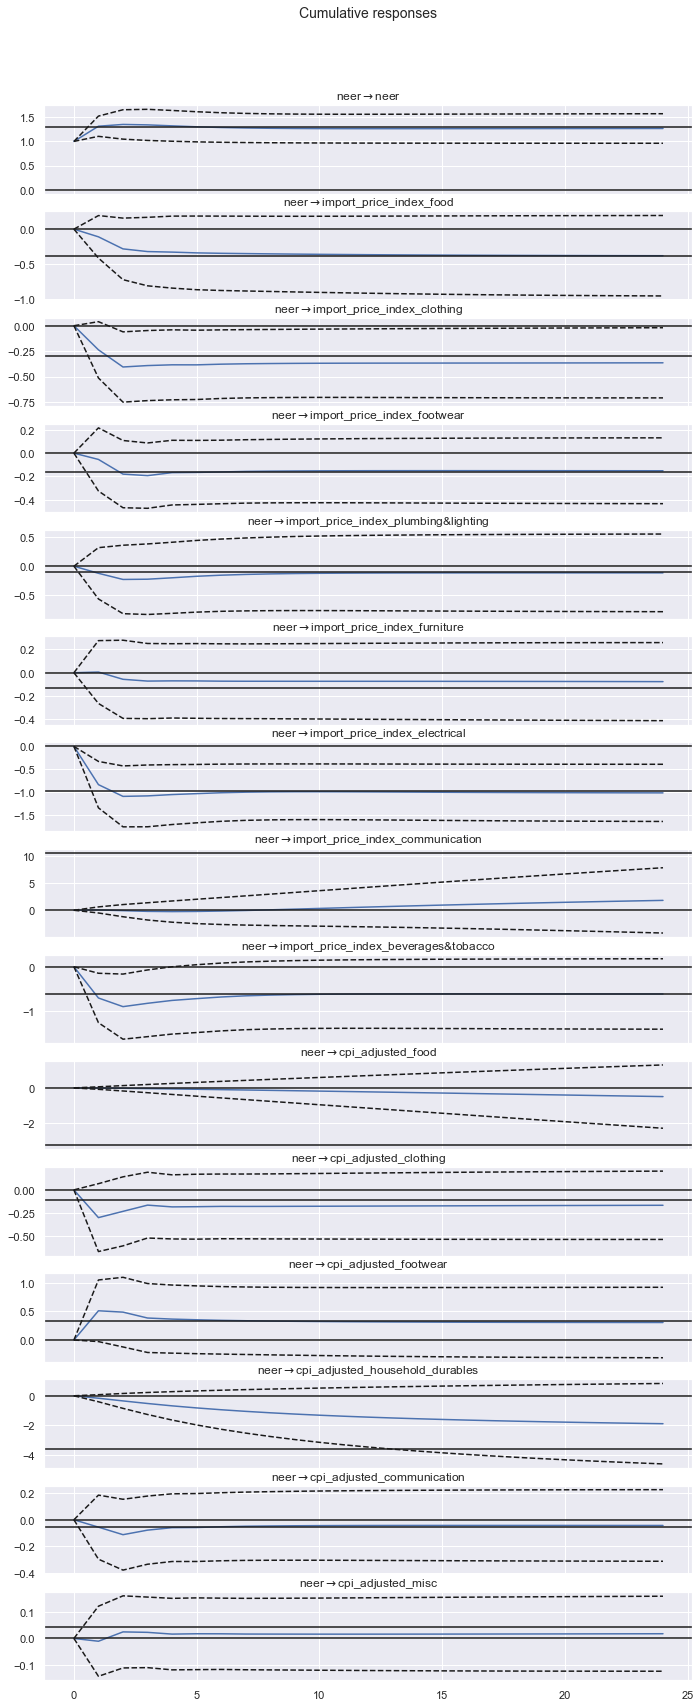

In [89]:
irf_plot = irf.plot_cum_effects(orth=False, impulse = 'neer')

irf_plot.set_figheight(25)
irf_plot.set_figwidth(10)

### IPI Categories -> CPI Categories (Respectively)

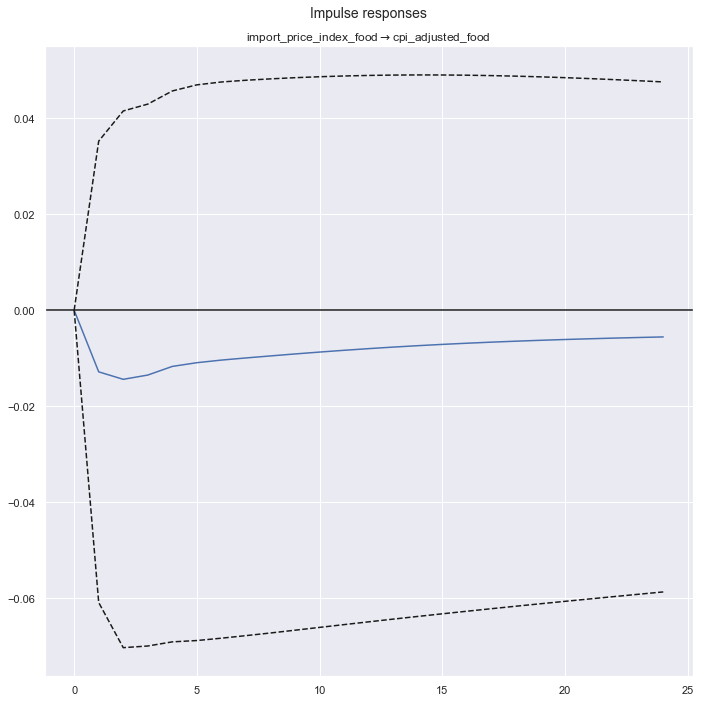

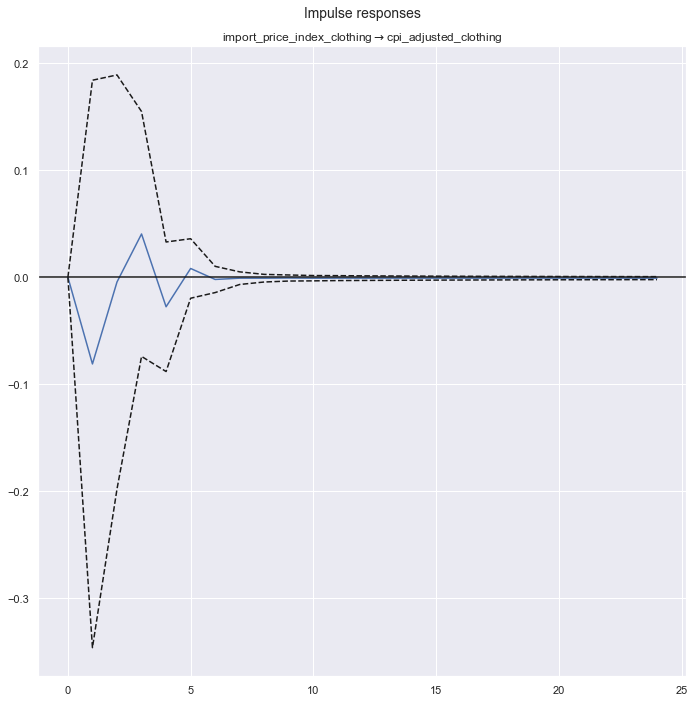

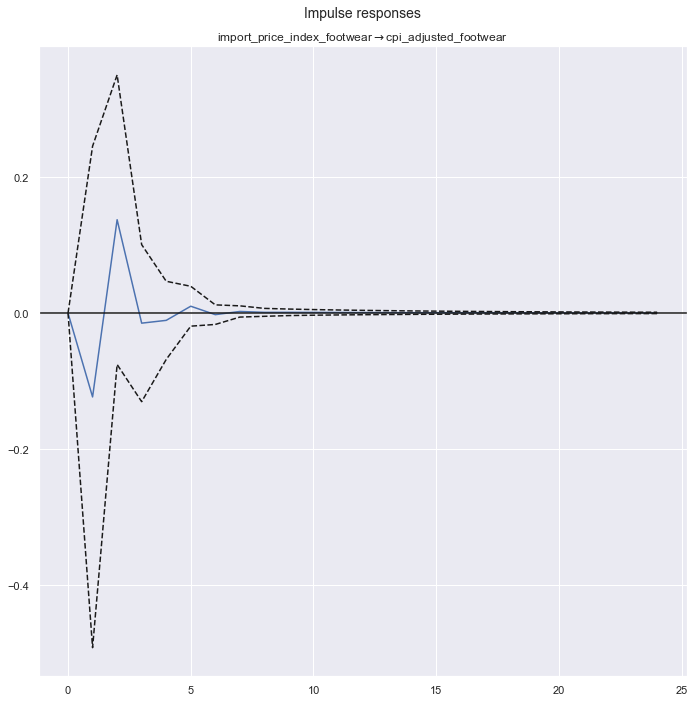

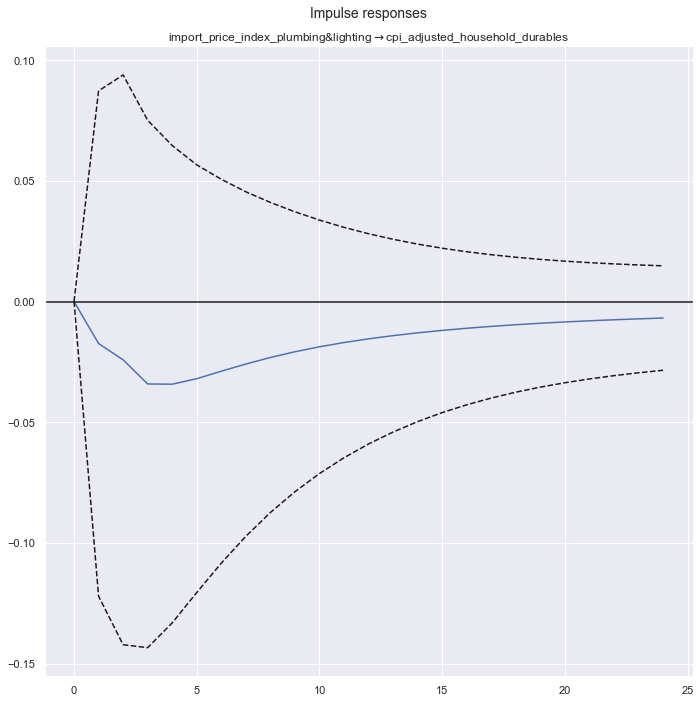

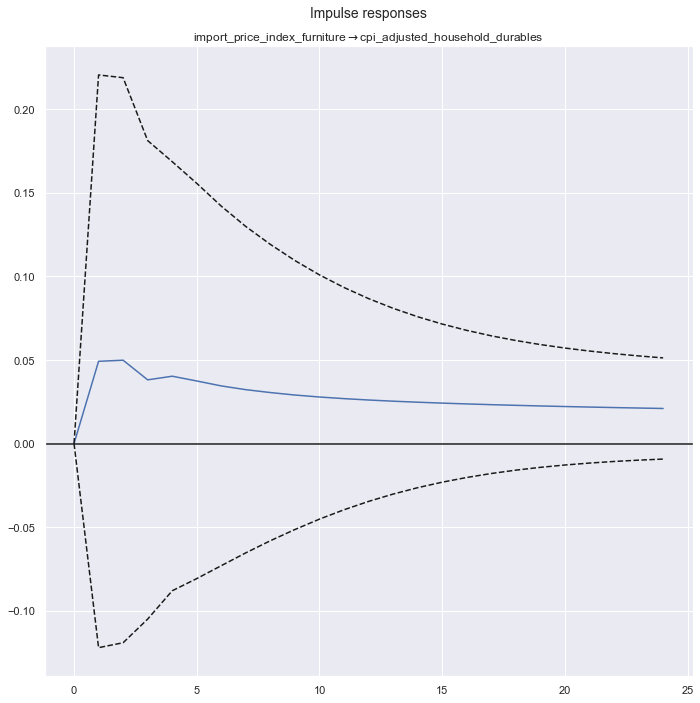

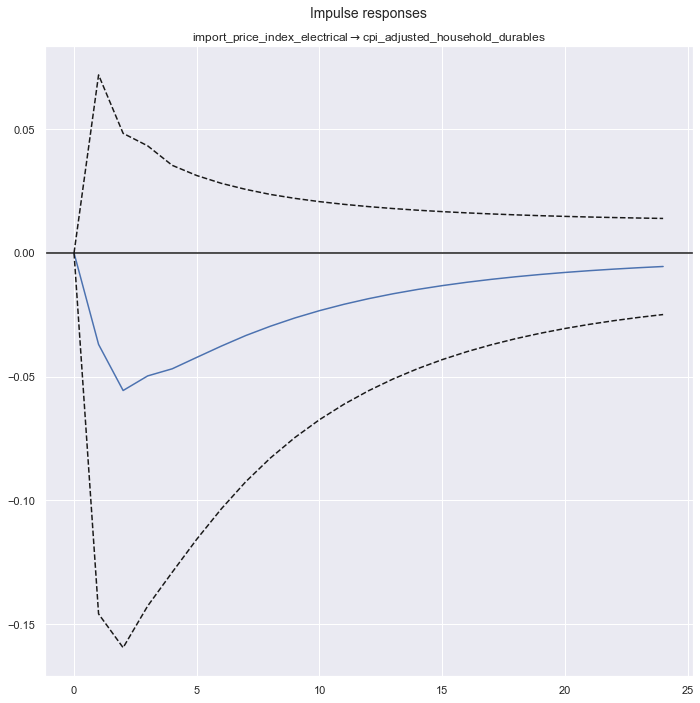

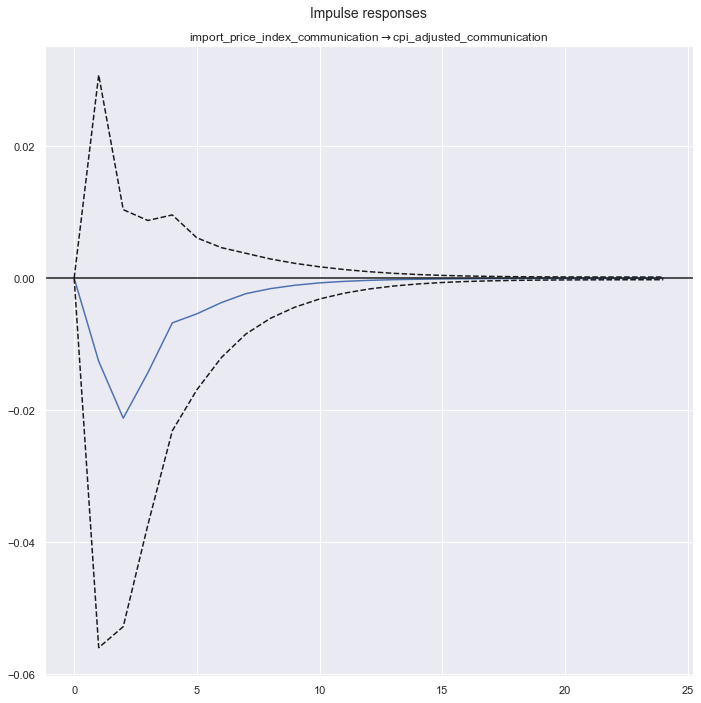

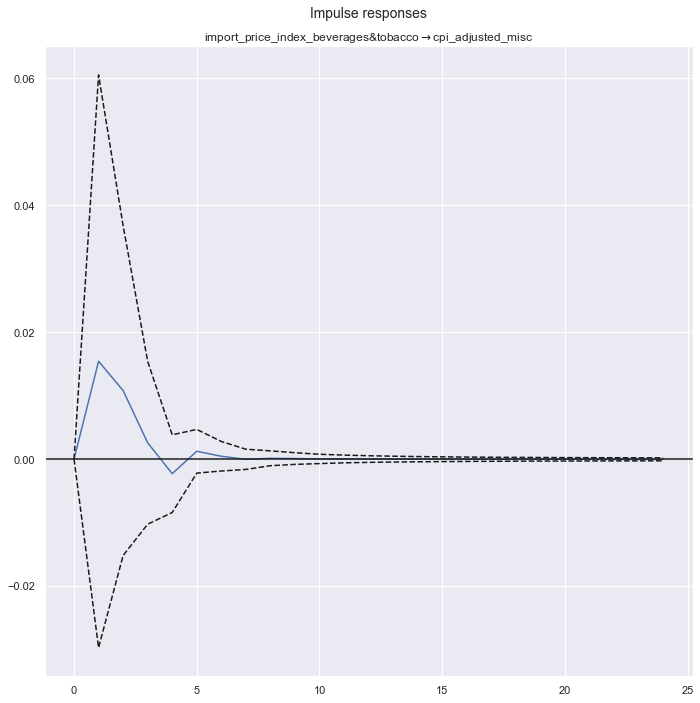

In [96]:
import_cat = ['import_price_index_food', 'import_price_index_clothing', 
                   'import_price_index_footwear', 'import_price_index_plumbing&lighting', 
                   'import_price_index_furniture', 'import_price_index_electrical', 'import_price_index_communication',
                   'import_price_index_beverages&tobacco']
cpi_cat = ['cpi_adjusted_food', 'cpi_adjusted_clothing',
                   'cpi_adjusted_footwear', 'cpi_adjusted_household_durables', 'cpi_adjusted_communication',
                   'cpi_adjusted_misc']

j = 0
for i in range(len(import_cat)):
    cat = import_cat[i]
    if cat == 'import_price_index_plumbing&lighting' or cat == 'import_price_index_furniture' or cat == 'import_price_index_electrical':
        irf_plot = irf.plot(orth=False, impulse = cat, response = cpi_cat[3])
        j = 4
    else:
        irf_plot = irf.plot(orth=False, impulse = cat, response = cpi_cat[j])
        j = j+1


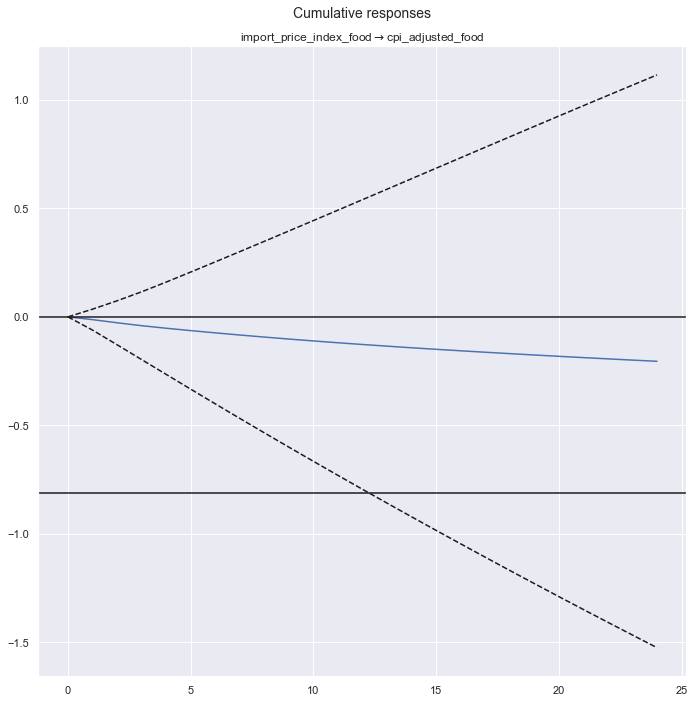

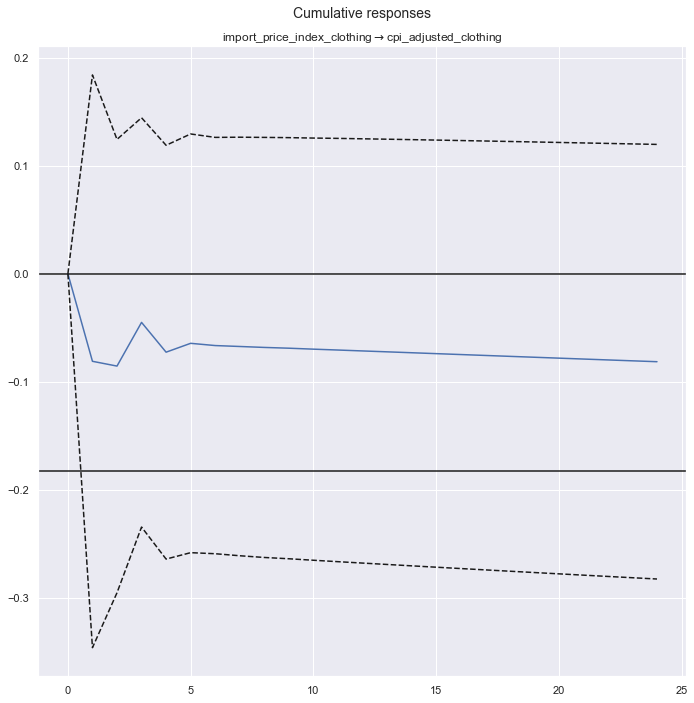

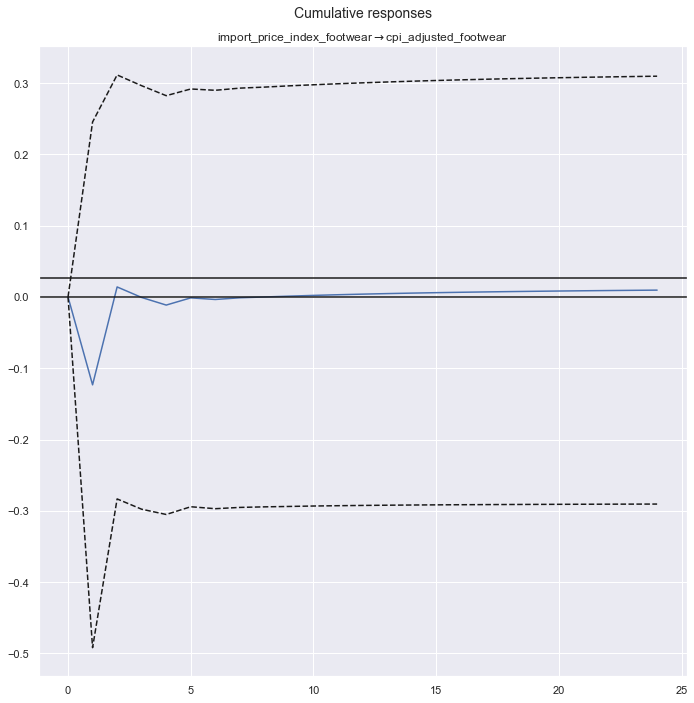

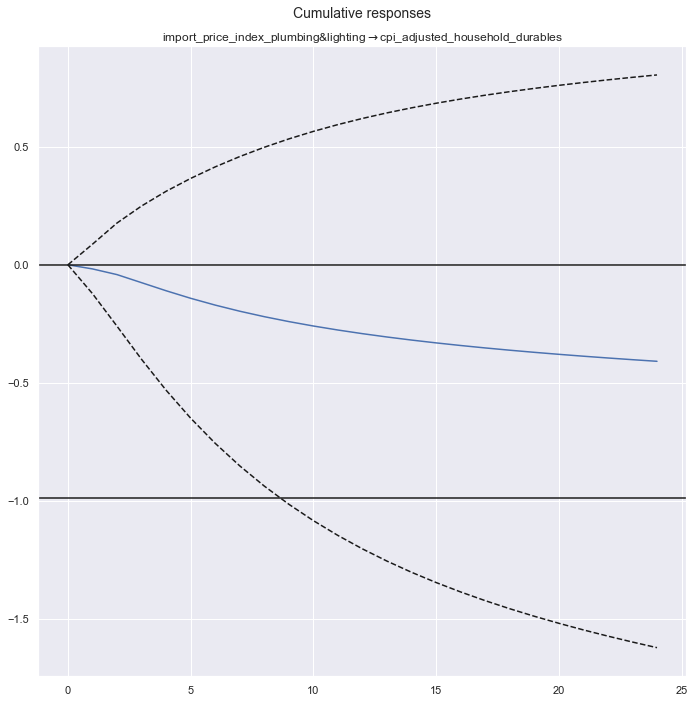

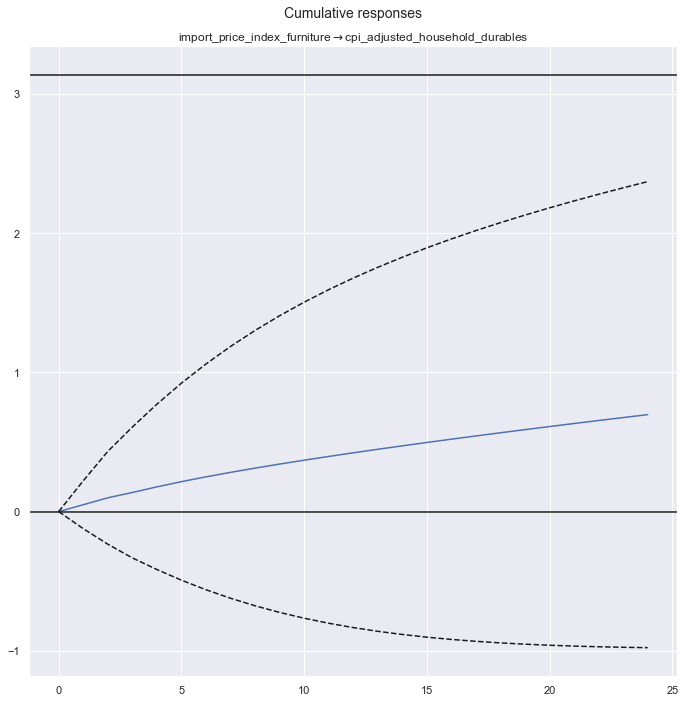

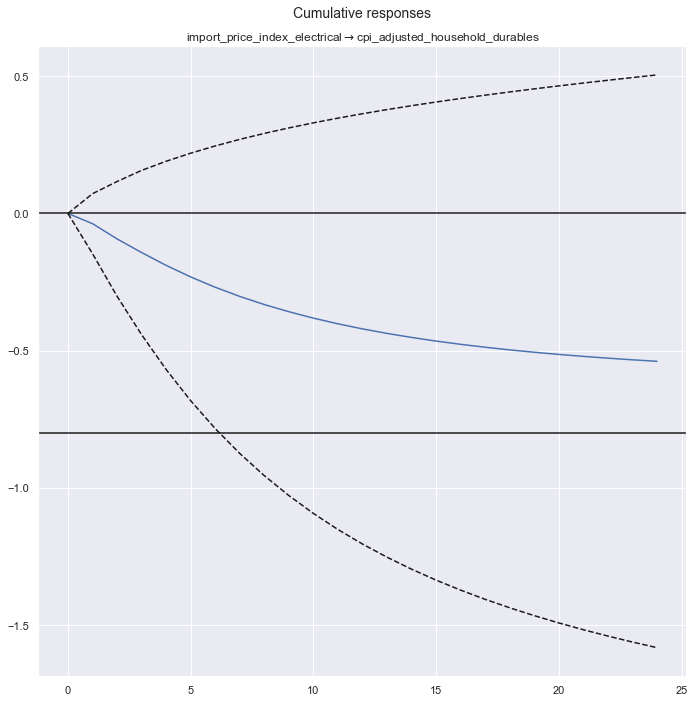

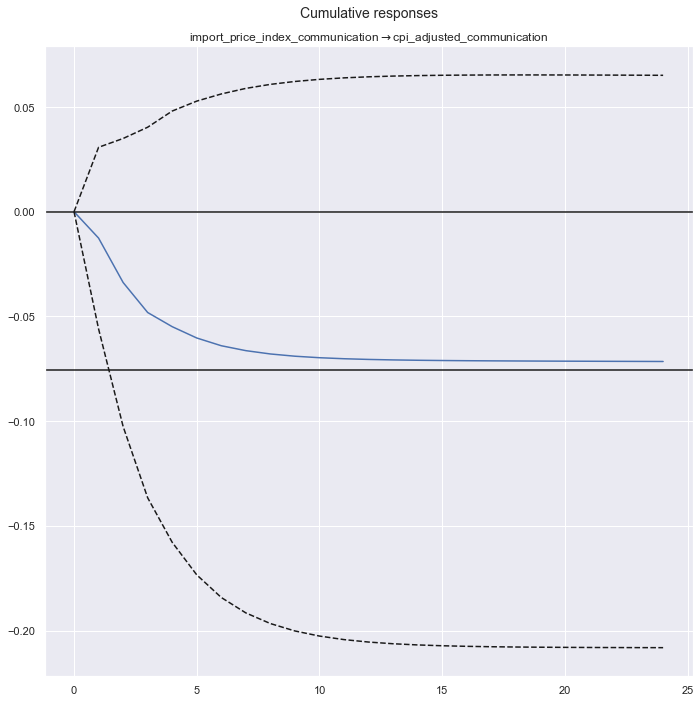

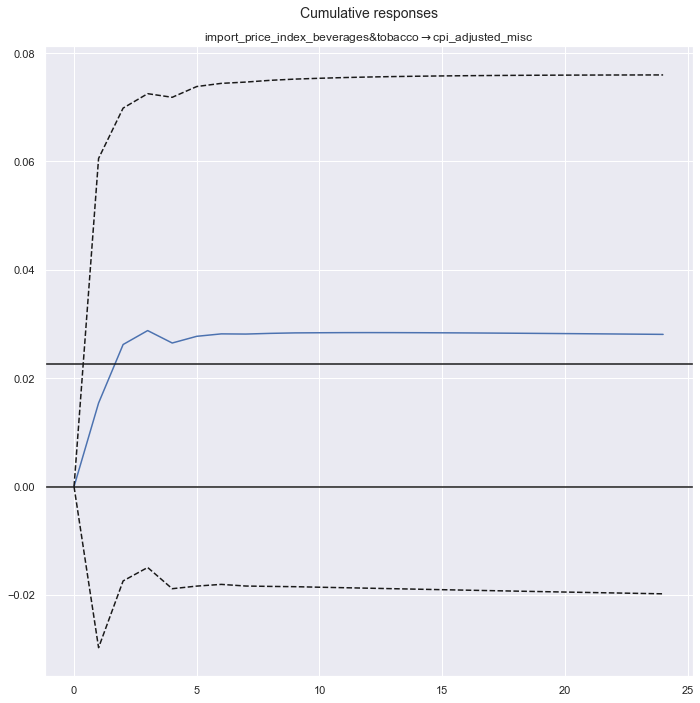

In [98]:
j = 0
for i in range(len(import_cat)):
    cat = import_cat[i]
    if cat == 'import_price_index_plumbing&lighting' or cat == 'import_price_index_furniture' or cat == 'import_price_index_electrical':
        irf_plot = irf.plot_cum_effects(orth=False, impulse = cat, response = cpi_cat[3])
        j = 4
    else:
        irf_plot = irf.plot_cum_effects(orth=False, impulse = cat, response = cpi_cat[j])
        j = j+1


## VECM

In [108]:
# do the johansen test to see if cointegration exists or not
from statsmodels.tsa.vector_ar.vecm import VECM, coint_johansen
cols = ['neer', 'cpi_adjusted', 'export_price_index', 'import_price_index']
def print_coint_results(coint_results):
    print ('--------------------------------------------------')
    print ('--> Trace Statistics')
    print ('variable statistic Crit-90% Crit-95%  Crit-99%')
    for i in range(len(coint_results.lr1)):
        print ('r =', i, '\t', round(coint_results.lr1[i], 4), coint_results.cvt[i, 0], coint_results.cvt[i, 1], coint_results.cvt[i, 2])
    print ('--------------------------------------------------')

coint_results = coint_johansen(df[cols], det_order=0, k_ar_diff=3)
print_coint_results(coint_results)

--------------------------------------------------
--> Trace Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 141.9217 44.4929 47.8545 54.6815
r = 1 	 87.751 27.0669 29.7961 35.4628
r = 2 	 47.4399 13.4294 15.4943 19.9349
r = 3 	 21.3253 2.7055 3.8415 6.6349
--------------------------------------------------


In [110]:
vecm_model = VECM(endog = df[cols], k_ar_diff = 3, coint_rank = 1, deterministic = 'nc')
vecm_fit = vecm_model.fit()
vecm_fit.summary()
print(vecm_fit.test_whiteness())

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 112.972, critical value: 133.257>, p-value: 0.353>
